#### Loading the dataset

I am trying to determine which features are important for determining whether a customer is satisfied or dissatisfied.

In [332]:
# Below I am importing the relevant Python 3 libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random
np.random.seed(123)
random.seed(123)

from sklearn.model_selection import train_test_split

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

First I need to import the data, which is in a Microsoft Excel format.

In [333]:
# Below I am setting df to our data
import os
os.getcwd()
df = pd.read_excel("satisfaction_2015.xlsx")

In [334]:
# Below I am looking at the first 10 rows of the dataframe
df.head(10)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0
5,129488,neutral or dissatisfied,Female,disloyal Customer,15,Personal Travel,Eco,2704,1,0,...,1,1,5,3,5,5,5,1,0,0.0
6,69507,neutral or dissatisfied,Male,disloyal Customer,51,Personal Travel,Eco,1746,1,0,...,1,1,5,3,5,4,4,1,20,22.0
7,126309,neutral or dissatisfied,Female,disloyal Customer,26,Personal Travel,Eco,650,1,1,...,2,2,2,5,2,1,3,2,0,0.0
8,123581,neutral or dissatisfied,Female,disloyal Customer,37,Personal Travel,Eco,1773,1,1,...,2,2,2,5,3,3,3,2,5,4.0
9,24129,neutral or dissatisfied,Female,disloyal Customer,65,Personal Travel,Eco,584,1,1,...,4,4,3,4,4,4,3,4,0,13.0


## Exploring the data and cleaning

In [335]:
# Below I am looking at the shape of the dataframe:
df.shape

(129880, 24)

In [336]:
# Below i am identifying if any columns have any null values
df_nulls = df.isna().any()
df_nulls.value_counts()

False    23
True      1
dtype: int64

In [337]:
# Below I am identifying the % of null values in each column
df.isnull().sum()/len(df)

id                                   0.000000
satisfaction_v2                      0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [338]:
# Below I am identifying the rows which have null values
df[df['Arrival Delay in Minutes'].isnull()]

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
194,44820,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,491,5,4,...,3,3,1,4,3,3,4,3,0,NaN
197,46936,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,776,5,5,...,3,3,5,2,5,3,5,3,7,NaN
351,61021,satisfied,Female,Loyal Customer,21,Personal Travel,Eco,3365,0,2,...,5,5,4,1,4,2,3,5,20,NaN
452,40480,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,222,0,3,...,4,2,1,1,3,4,3,2,0,NaN
916,19597,satisfied,Male,Loyal Customer,28,Personal Travel,Eco,173,0,5,...,5,5,4,4,5,3,4,5,24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127457,125075,satisfied,Female,Loyal Customer,41,Business travel,Business,3758,1,1,...,5,5,5,5,5,4,5,5,23,NaN
127658,75644,satisfied,Female,Loyal Customer,60,Business travel,Business,3041,3,3,...,4,5,5,5,5,4,5,3,0,NaN
127945,40434,satisfied,Male,Loyal Customer,44,Business travel,Business,3383,2,2,...,4,5,5,5,5,5,5,4,70,NaN
128337,120101,satisfied,Male,Loyal Customer,39,Business travel,Business,1576,4,4,...,5,5,5,5,5,3,5,5,0,NaN


If the missing values where something we could fix (like lattitude, longitude etc.) then we could try to replace the missing values with correct ones. Here this is not the case so our best course of action is to delete these rows. Luckily they account for a small % of the overall dataset.

In [339]:
# Below I am dropping the null values in the 'Arrival Delay in Minutes' column
df = df.dropna(how='any',axis=0,thresh=None, subset=None, inplace=False)

In [340]:
# Below I am sanity checking that the null values have been removed
df.isnull().sum()/len(df)

id                                   0.0
satisfaction_v2                      0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
dtype: float64

The id of a customer has no relavence to if a customer is satisfied or not, since the id is assigned at random. Therefore we can remove it from our dataframe.

In [341]:
# Below I am dropping the id colum from the dataframe
df= df.drop('id', axis=1)

We need to understand what each column is showing. We can look at the datatype of each column:

In [342]:
# Below I am looking at the using the built in 'info()' function to identify the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     1294

In [343]:
# Below I am checking the sum of 'Arrival Delay in Minutes'
df['Arrival Delay in Minutes'].sum()

1954105.0

We can see that the sum of 'Arrival Delay in Minutes' is a whole number, which means it can be stored as an int data type.

In [344]:
# Below I am changing the the 'Arrival Delay in Minutes' column to the int datatype
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

In [345]:
# Below I am oonfirming that 'Arrival Delay in Minutes' is now an int
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction_v2                    129487 non-null  object
 1   Gender                             129487 non-null  object
 2   Customer Type                      129487 non-null  object
 3   Age                                129487 non-null  int64 
 4   Type of Travel                     129487 non-null  object
 5   Class                              129487 non-null  object
 6   Flight Distance                    129487 non-null  int64 
 7   Inflight wifi service              129487 non-null  int64 
 8   Departure/Arrival time convenient  129487 non-null  int64 
 9   Ease of Online booking             129487 non-null  int64 
 10  Gate location                      129487 non-null  int64 
 11  Food and drink                     129487 non-null  

In [346]:
print("-------------------------------------------------------------------")
print(f"The unique values for 'satisfaction_v2' are:")
print("\n")
print(df['satisfaction_v2'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Gender' are:")
print("\n")
print(df['Gender'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Customer Type 'are:")
print("\n")
print(df['Customer Type'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Age 'are:")
print("\n")
print(df['Age'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Type of Travel'are:")
print("\n")
print(df['Type of Travel'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Class'are:")
print("\n")
print(df['Class'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Flight Distance'are:")
print("\n")
print(df['Flight Distance'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Inflight wifi' service'are:")
print("\n")
print(df['Inflight wifi service'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Departure/Arrival' time convenient'are:")
print("\n")
print(df['Departure/Arrival time convenient'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Ease of Online booking' time convenient'are:")
print("\n")
print(df['Ease of Online booking'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Gate location' time convenient'are:")
print("\n")
print(df['Gate location'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Food and drink' time convenient'are:")
print("\n")
print(df['Food and drink'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Online boarding' time convenient'are:")
print("\n")
print(df['Online boarding'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Seat comfort' time convenient'are:")
print("\n")
print(df['Seat comfort'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Inflight entertainment' time convenient'are:")
print("\n")
print(df['Inflight entertainment'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'On-board service' time convenient'are:")
print("\n")
print(df['On-board service'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Leg room service' time convenient'are:")
print("\n")
print(df['Leg room service'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Baggage handling' time convenient'are:")
print("\n")
print(df['Baggage handling'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Checkin service' time convenient'are:")
print("\n")
print(df['Checkin service'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Inflight service' time convenient'are:")
print("\n")
print(df['Inflight service'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Cleanliness' time convenient'are:")
print("\n")
print(df['Cleanliness'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Departure Delay in Minutes' time convenient'are:")
print("\n")
print(df['Departure Delay in Minutes'].value_counts())
print("-------------------------------------------------------------------")
print(f"The unique values for 'Arrival Delay in Minutes' time convenient'are:")
print("\n")
print(df['Arrival Delay in Minutes'].value_counts())
print("-------------------------------------------------------------------")

-------------------------------------------------------------------
The unique values for 'satisfaction_v2' are:


neutral or dissatisfied    73225
satisfied                  56262
Name: satisfaction_v2, dtype: int64
-------------------------------------------------------------------
The unique values for 'Gender' are:


Female    65703
Male      63784
Name: Gender, dtype: int64
-------------------------------------------------------------------
The unique values for 'Customer Type 'are:


Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64
-------------------------------------------------------------------
The unique values for 'Age 'are:


39    3681
25    3501
40    3203
44    3099
41    3081
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64
-------------------------------------------------------------------
The unique values for 'Type of Travel'are:


Business travel    89445
Personal Travel  

model fit coef logistic
feature importance scikit for knn and dt

dt no dropping else yes
smote

## Data Description v1

Categorical Columns:
- `satisfaction_v2` --> This is our target feature. It is whether or not a customer was satisfied
- `Gender` --> This shows whether or not the customer was male or female
- `Type of Travel` --> This shows whether or not the customer travelled for business or personal travel
- `Class` --> This is the type of class the customer flew in (Eco, Eco Plus, Business)
- `Gate location` --> This is the satisfaction rating of gate location

Numerical Column With No Range Limit:
- `Age` --> This is the age of the customer
- `Flight Distance` --> This is the flight distance in miles
- `Gate location` --> This is the satisfaction rating of gate location
- `Departure Delay in Minutes` --> This is the numnber of minutes the flight was delayed at departure
- `Arrival Delay in Minutes` --> This is the numnber of minutes the flight was delayed at arrival to destination

Numerical Column Rating 0 - 5:
- `Inflight wifi` --> This is the satisfaction rating of the inflight wifi
- `Departure/Arrival time` --> This is the satisfaction rating of the inflight wifi
- `Ease of Online booking` --> This is the satisfaction rating of the online booking process
- `Food and drink` --> This is the satisfaction rating of the food and drink offered in flight
- `Online boarding` --> This is the satisfaction rating of the online boarding
- `Seat comfort` --> This is the satisfaction rating of the inflight seats
- `Inflight entertainment` --> This is the satisfaction rating of the inflight entertainment
- `On-board service` --> This is the satisfaction rating of onboard service
- `Baggage handling` --> This is the satisfaction rating of baggage handling
- `Checkin service` --> This is the satisfaction rating of the checkin service
- `Leg room service` --> This is the satisfaction rating of inflight leg room
- `Inflight service` --> This is the satisfaction rating of the inflight service
- `Cleanliness` --> This is the satisfaction rating of how clean the aeroplane


These column names need to be optimised so they best describe what they are showing.

In [347]:
df.rename(columns = {'satisfaction_v2' : 'satisfaction_target'}, inplace=True)
df.rename(columns = {'Gender': 'customer_gender'}, inplace=True)
df.rename(columns = { 'Customer Type' : 'customer_loyalty_type'}, inplace=True)
df.rename(columns = {'Age': 'customer_age'}, inplace=True)
df.rename(columns = {'Type of Travel' : 'customer_travel_type'}, inplace=True)
df.rename(columns = {'Class' : 'customer_class_type'}, inplace=True)
df.rename(columns = {'Flight Distance' : 'flight_distance'}, inplace=True)
df.rename(columns = {'Inflight wifi service' : 'flight_wifi_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Departure/Arrival time convenient' : 'departure/arrival_time_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Ease of Online booking' : 'online_booking_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Gate location' : 'gate_location_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Food and drink' : 'food/drink_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Online boarding' : 'online_boarding_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Seat comfort' : 'seat_comfort_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Inflight entertainment' : 'inflight_entertainment_satisfaction_rating'}, inplace=True)
df.rename(columns = {'On-board service' : 'onboard_service_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Leg room service' : 'leg_room_n_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Baggage handling' : 'baggage_handling_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Checkin service' : 'checkin_service_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Inflight service' : 'inflight_service_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Cleanliness' : 'cleanliness_satisfaction_rating'}, inplace=True)
df.rename(columns = {'Departure Delay in Minutes' : 'departure_delay_in_minutes'}, inplace=True)
df.rename(columns = {'Arrival Delay in Minutes' : 'arrival_delay_in_minutes'}, inplace=True)

In [348]:
# Below I am sanity checking that the column names have been changed correctly
df.head()

,satisfaction_target,customer_gender,customer_loyalty_type,customer_age,customer_travel_type,customer_class_type,flight_distance,flight_wifi_satisfaction_rating,departure/arrival_time_satisfaction_rating,online_booking_satisfaction_rating,...,seat_comfort_satisfaction_rating,inflight_entertainment_satisfaction_rating,onboard_service_satisfaction_rating,leg_room_n_satisfaction_rating,baggage_handling_satisfaction_rating,checkin_service_satisfaction_rating,inflight_service_satisfaction_rating,cleanliness_satisfaction_rating,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,...,3,3,1,5,3,3,4,3,0,0
1,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,...,3,2,1,1,4,4,3,2,0,0
2,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,...,3,3,3,5,3,2,3,3,0,0
3,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,...,4,4,5,4,5,5,5,4,0,0
4,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,...,3,3,3,4,5,3,4,3,0,0


## Dataframe v2

|Column names|Data types|Notes|
|---|---|---|
|Hotel_Address|Object|||
|atisfaction_targetint|Scoring given by customers which is not in 1 to 10 scale||
|Review_Date|Object|With a format of __month/day/year__ without zero padding, ie __6/3/2016__||
|Average_Score|float|Average score for each hotel, range from 1 to 10||
|Hotel_Name|Object|||
|Reviewer_Nationality|Object|Contains 227 unique values|
|Negative_Review|Object|String of negative reviews|
|Review_Total_Negative_Word_Counts|int|Amount of words classified as negative semantic in the reviews||
|Total_Number_of_Reviews|int|Total number of reviews received by the hotels|
|Positive_Review|Object|String of positive review given by the customer|
|Review_Total_Positive_Word_Counts|Int|Amount of words classifed as positive semantic in the reviews|
|Total_Number_of_Reviews_Reviewer_Has_Given|int|Total number of reviews given by the same customer|
|Reviewer_Score|float|Review score given by the customer, range from 1 to 10|
|Tags|Object|List of tags containing information of room types, number of guests etc, disguised as strings.|
|days_since_review|Int|Number of days until reviews were received after the stays of customers|
|lat|float|||
|lng|float|||

## Making Categorical Columns Numerical

In [350]:
# Below I am creating dummy variables for categorical columns

satisfaction_dummies = pd.get_dummies(df.satisfaction_target,  prefix = 'target').iloc[:,1:]
df = pd.concat([df, satisfaction_dummies], axis=1)

gender_dummies = pd.get_dummies(df.customer_gender,  prefix = 'gender').iloc[:,1:]
df = pd.concat([df, gender_dummies], axis=1)

loyalty_dummies = pd.get_dummies(df.customer_loyalty_type,  prefix = 'loyalty').iloc[:,1:]
df = pd.concat([df, loyalty_dummies], axis=1)

travel_dummies = pd.get_dummies(df.customer_travel_type,  prefix = 'travel').iloc[:,1:]
df = pd.concat([df, travel_dummies], axis=1)

class_dummies = pd.get_dummies(df.customer_class_type,  prefix = 'class').iloc[:,1:]
df = pd.concat([df, class_dummies], axis=1)

In [351]:
# Below I am making all column names lower case
df= df.rename(columns=str.lower)

In [352]:
# Below I am dropping all categorical columns
df = df.drop('satisfaction_target', axis=1)
df = df.drop('customer_loyalty_type', axis=1)
df = df.drop('customer_travel_type', axis=1)
df = df.drop('customer_class_type', axis=1)
df = df.drop('customer_gender', axis=1)

In [361]:
# Below I am sanity checking that the correct columns have been removed, added and renamed to lower case
df.head()

,customer_age,flight_distance,flight_wifi_satisfaction_rating,departure/arrival_time_satisfaction_rating,online_booking_satisfaction_rating,gate_location_satisfaction_rating,food/drink_satisfaction_rating,online_boarding_satisfaction_rating,seat_comfort_satisfaction_rating,inflight_entertainment_satisfaction_rating,...,inflight_service_satisfaction_rating,cleanliness_satisfaction_rating,departure_delay_in_minutes,arrival_delay_in_minutes,target_satisfied,gender_male,loyalty_disloyal customer,travel_personal travel,class_eco,class_eco plus
0,56,369,0,2,0,4,3,0,3,3,...,4,3,0,0,1,1,1,1,1,0
1,49,2486,0,2,1,4,2,1,3,2,...,3,2,0,0,1,1,1,1,1,0
2,55,1448,0,3,0,4,3,0,3,3,...,3,3,0,0,1,1,1,1,1,0
3,36,1501,0,4,0,3,4,0,4,4,...,5,4,0,0,1,0,1,1,1,0
4,55,577,0,5,0,3,3,5,3,3,...,4,3,0,0,1,1,1,1,1,0


## Train, Test, Validation Split

In [353]:
print(f"The main dataframe has a shape of {df.shape}")
print(f"The test dataset should be 25% of the original dataframe so it's shape should be ~ ({df.shape[0]*0.25},{df.shape[-1]})")
print(f"The validation dataset should be 30% of the train dataset so it's shape should be ~ ({(df.shape[0]*0.75)*0.3},{df.shape[-1]})")
print(f"The train dataset should be 70% of the train dataset so it's shape should be ~ ({(df.shape[0]*0.75)*0.7},{df.shape[-1]})")


The main dataframe has a shape of (129487, 24)
The test dataset should be 25% of the original dataframe so it's shape should be ~ (32371.75,24)
The validation dataset should be 30% of the train dataset so it's shape should be ~ (29134.575,24)
The train dataset should be 70% of the train dataset so it's shape should be ~ (67980.675,24)


In [354]:
# Below I am setting our train dataset target y to 'satisfaction_satisfied'
y = df['target_satisfied']

# Below I am setting our train dataset data to every column besides 'satisfaction_satisfied'
X = df.drop('target_satisfied', axis = 1)

In [355]:
# Below I am splitting the original dataframe into a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [356]:
print(f"The shape of X_train is {X_train.shape}, the shape of y_train is {y_train.shape})")
print(f"The shape of X_test is {X_test.shape}, the shape of y_test is {y_test.shape})")

The shape of X_train is (97115, 23), the shape of y_train is (97115,))
The shape of X_test is (32372, 23), the shape of y_test is (32372,))


In [357]:
# Below I am splitting the dataset into a train and validation split
X_train, X_validation, y_train, y_validation = \
    train_test_split(X_train, y_train, test_size = 0.3,
            random_state=1, stratify=y_train)

In [358]:
print(f"The shape of X_train is {X_train.shape}, the shape of y_train is {y_train.shape})")
print(f"The shape of X_validation is {X_validation.shape}, the shape of y_validation is {y_validation.shape})")

The shape of X_train is (67980, 23), the shape of y_train is (67980,))
The shape of X_validation is (29135, 23), the shape of y_validation is (29135,))


In total we get the following:

In [359]:
print(f"We calculated the test dataframe to have a shape of : ~ ({df.shape[0]*0.25},{df.shape[-1]})")
print(f"The shape of X_test is {X_test.shape}, the shape of y_test is {y_test.shape})")
print("\n")
print(f"We calculated the validation dataframe to have a shape of : ~ ({(df.shape[0]*0.75)*0.3},{df.shape[-1]})")
print(f"The shape of X_validation is {X_validation.shape}, the shape of y_validation is {y_validation.shape})")
print("\n")
print(f"We calculated the train dataframe to have a shape of : ~ ({(df.shape[0]*0.75)*0.7},{df.shape[-1]})")
print(f"The shape of X_train is {X_train.shape}, the shape of y_train is {y_train.shape})")

We calculated the test dataframe to have a shape of : ~ (32371.75,24)
The shape of X_test is (32372, 23), the shape of y_test is (32372,))


We calculated the validation dataframe to have a shape of : ~ (29134.575,24)
The shape of X_validation is (29135, 23), the shape of y_validation is (29135,))


We calculated the train dataframe to have a shape of : ~ (67980.675,24)
The shape of X_train is (67980, 23), the shape of y_train is (67980,))


#### Below I am sanity checking that each dataframe is correct

In [364]:
X_train.head(2)

,customer_age,flight_distance,flight_wifi_satisfaction_rating,departure/arrival_time_satisfaction_rating,online_booking_satisfaction_rating,gate_location_satisfaction_rating,food/drink_satisfaction_rating,online_boarding_satisfaction_rating,seat_comfort_satisfaction_rating,inflight_entertainment_satisfaction_rating,...,checkin_service_satisfaction_rating,inflight_service_satisfaction_rating,cleanliness_satisfaction_rating,departure_delay_in_minutes,arrival_delay_in_minutes,gender_male,loyalty_disloyal customer,travel_personal travel,class_eco,class_eco plus
25533,8,646,3,4,3,2,1,3,1,1,...,2,2,1,21,34,1,0,1,1,0
117296,56,2475,1,1,1,1,2,4,4,5,...,3,5,5,3,0,0,0,0,0,0


In [365]:
X_test.head(2)

,customer_age,flight_distance,flight_wifi_satisfaction_rating,departure/arrival_time_satisfaction_rating,online_booking_satisfaction_rating,gate_location_satisfaction_rating,food/drink_satisfaction_rating,online_boarding_satisfaction_rating,seat_comfort_satisfaction_rating,inflight_entertainment_satisfaction_rating,...,checkin_service_satisfaction_rating,inflight_service_satisfaction_rating,cleanliness_satisfaction_rating,departure_delay_in_minutes,arrival_delay_in_minutes,gender_male,loyalty_disloyal customer,travel_personal travel,class_eco,class_eco plus
48172,37,308,2,2,2,3,3,2,3,3,...,4,4,3,14,24,1,1,0,1,0
61889,24,951,5,0,5,3,5,5,5,5,...,5,5,5,0,0,0,1,0,0,0


In [366]:
X_validation.head(2)

,customer_age,flight_distance,flight_wifi_satisfaction_rating,departure/arrival_time_satisfaction_rating,online_booking_satisfaction_rating,gate_location_satisfaction_rating,food/drink_satisfaction_rating,online_boarding_satisfaction_rating,seat_comfort_satisfaction_rating,inflight_entertainment_satisfaction_rating,...,checkin_service_satisfaction_rating,inflight_service_satisfaction_rating,cleanliness_satisfaction_rating,departure_delay_in_minutes,arrival_delay_in_minutes,gender_male,loyalty_disloyal customer,travel_personal travel,class_eco,class_eco plus
99628,29,2329,5,5,5,5,4,4,4,4,...,5,4,4,0,0,0,0,0,0,0
71461,44,2169,3,3,1,3,5,5,4,2,...,4,2,3,0,0,1,0,0,0,0


From the above we can confirm the splits have gone through correctly.

## Scaling the datasets

MinMaxScaler for Binary Columns:
- gender_male
- loyalty_disloyal customer
- travel_personal travel
- class_eco
- class_eco plus
- target_satisfied

***


StandardScaler:
- customer_age
- flight_distance
- flight_wifi_satisfaction_rating
- departure/arrival_time_satisfaction_rating
- online_booking_satisfaction_rating
- gate_location_satisfaction_rating
- food/drink_satisfaction_rating
- online_boarding_satisfaction_rating
- seat_comfort_satisfaction_rating
- inflight_entertainment_satisfaction_rating
- onboard_service_satisfaction_rating
- leg_room_n_satisfaction_rating
- baggage_handling_satisfaction_rating
- checkin_service_satisfaction_rating
- inflight_service_satisfaction_rating
- cleanliness_satisfaction_rating
- departure_delay_in_minutes
- arrival_delay_in_minutes

Do I scale data each time i run a model?

In [369]:
# Below I am importing the relavent transformers and scalers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Below I am passing the specified columns through a StandardScaler whilst leaving the remaining ones untouched
data = df

col_names = list(df_train)
features = data[col_names]


ct = ColumnTransformer([
        ('somename', StandardScaler(), ['customer_age', 'flight_distance', 'flight_wifi_satisfaction_rating','departure/arrival_time_satisfaction_rating','online_booking_satisfaction_rating', 'gate_location_satisfaction_rating', 'food/drink_satisfaction_rating', 'online_boarding_satisfaction_rating', 'seat_comfort_satisfaction_rating', 'inflight_entertainment_satisfaction_rating', 'onboard_service_satisfaction_rating', 'eg_room_n_satisfaction_rating', 'baggage_handling_satisfaction_rating', 'checkin_service_satisfaction_rating', 'inflight_service_satisfaction_rating', 'cleanliness_satisfaction_rating', 'departure_delay_in_minutes', 'arrival_delay_in_minutes'])
    ], remainder='passthrough')

numeric_train_columns = ct.fit_transform(features)
numeric_train_columns

NameError: name 'df_train' is not defined

UP TO HERE

In [3]:
# Below I am importing the train dataset
df_train = pd.read_csv('air_train.csv')

In [4]:
# Below I am viewing the train dataset
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df_train.shape

(103904, 25)

In [6]:
# Below I am importing the test dataset
df_test = pd.read_csv('air_test.csv')

In [7]:
# Below I am viewing the test dataset
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
df_test.shape

(25976, 25)

In [9]:
train_nulls = df_train.isna().any()
train_nulls.value_counts()

False    24
True      1
dtype: int64

In [10]:
test_nulls = df_test.isna().any()
test_nulls.value_counts()

False    24
True      1
dtype: int64

Both datafranes have null values in a specific column.

In [11]:
df_train.isnull().sum()/len(df_train)

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [12]:
df_test.isnull().sum()/len(df_test)

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

The issue is in 'Arrival Delay in Minutes '. We can remove these columns.

In [13]:
df_train = df_train.dropna(how='any',axis=0,thresh=None, subset=None, inplace=False)

In [14]:
df_train.isnull().sum()/len(df_train)

Unnamed: 0                           0.0
id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction    

In [15]:
df_test = df_test.dropna(how='any',axis=0,thresh=None, subset=None, inplace=False)

In [16]:
df_test.isnull().sum()/len(df_test)

Unnamed: 0                           0.0
id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction    

Now the data has no null values.

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25893 non-null  int64  
 1   id                                 25893 non-null  int64  
 2   Gender                             25893 non-null  object 
 3   Customer Type                      25893 non-null  object 
 4   Age                                25893 non-null  int64  
 5   Type of Travel                     25893 non-null  object 
 6   Class                              25893 non-null  object 
 7   Flight Distance                    25893 non-null  int64  
 8   Inflight wifi service              25893 non-null  int64  
 9   Departure/Arrival time convenient  25893 non-null  int64  
 10  Ease of Online booking             25893 non-null  int64  
 11  Gate location                      25893 non-null  int

Each columns seems to be in the correct data format.

For ML models to work correctly all columns need to be numerical

In [19]:
gender_dummies = pd.get_dummies(df_train.Gender,  prefix = 'Gender').iloc[:,1:]
df_train = pd.concat([df_train, gender_dummies], axis=1)

In [20]:
customer_type_dummies = pd.get_dummies(df_train['Customer Type'],  prefix = 'Customer_Type').iloc[:,1:]
df_train = pd.concat([df_train, customer_type_dummies], axis=1)

In [21]:
travel_type_dummies = pd.get_dummies(df_train['Type of Travel'],  prefix = 'Type_of_Travel').iloc[:,1:]
df_train = pd.concat([df_train, travel_type_dummies], axis=1)

In [22]:
class_dummies = pd.get_dummies(df_train['Class'],  prefix = 'Class_Type').iloc[:,1:]
df_train = pd.concat([df_train, class_dummies], axis=1)

In [23]:
satisfaction_dummies = pd.get_dummies(df_train['satisfaction'],  prefix = 'satisfaction').iloc[:,1:]
df_train = pd.concat([df_train, satisfaction_dummies], axis=1)

In [24]:
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Type_Eco,Class_Type_Eco Plus,satisfaction_satisfied
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,25,18.0,neutral or dissatisfied,1,0,1,0,1,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,6.0,neutral or dissatisfied,1,1,0,0,0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,0,0.0,satisfied,0,0,0,0,0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,11,9.0,neutral or dissatisfied,0,0,0,0,0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,0,0.0,satisfied,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,0.0,neutral or dissatisfied,0,1,0,1,0,0
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,4,0,0.0,satisfied,1,0,0,0,0,1
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,7,14.0,neutral or dissatisfied,1,1,0,0,0,0
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,0,0.0,neutral or dissatisfied,0,1,0,1,0,0


In [25]:
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train = df_train.drop('id', axis=1)
df_train = df_train.drop('Gender', axis=1)
df_train = df_train.drop('Customer Type', axis=1)
df_train = df_train.drop('Type of Travel', axis=1)
df_train = df_train.drop('Class', axis=1)
df_train = df_train.drop('satisfaction', axis=1)

In [26]:
df_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Type_Eco,Class_Type_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,0,0,0,0,1


Now we need to repeat this process for the df_test dataset.

In [27]:
gender_dummies_test = pd.get_dummies(df_test.Gender,  prefix = 'Gender').iloc[:,1:]
df_test = pd.concat([df_test, gender_dummies_test], axis=1)
customer_type_dummies_test = pd.get_dummies(df_test['Customer Type'],  prefix = 'Customer_Type').iloc[:,1:]
df_test = pd.concat([df_test, customer_type_dummies_test], axis=1)
travel_type_dummies_test = pd.get_dummies(df_test['Type of Travel'],  prefix = 'Type_of_Travel').iloc[:,1:]
df_test = pd.concat([df_test, travel_type_dummies_test], axis=1)
class_dummies_test = pd.get_dummies(df_test['Class'],  prefix = 'Class_Type').iloc[:,1:]
df_test = pd.concat([df_test, class_dummies_test], axis=1)
satisfaction_dummies_test = pd.get_dummies(df_test['satisfaction'],  prefix = 'satisfaction').iloc[:,1:]
df_test = pd.concat([df_test, satisfaction_dummies_test], axis=1)

In [28]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Type_Eco,Class_Type_Eco Plus,satisfaction_satisfied
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,50,44.0,satisfied,0,0,0,1,0,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,5,0,0.0,satisfied,0,0,0,0,0,1
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,0,0.0,neutral or dissatisfied,1,1,0,1,0,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,4,0,6.0,satisfied,1,0,0,0,0,1
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,4,0,20.0,satisfied,0,0,0,1,0,1


In [29]:
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('id', axis=1)
df_test = df_test.drop('Gender', axis=1)
df_test = df_test.drop('Customer Type', axis=1)
df_test = df_test.drop('Type of Travel', axis=1)
df_test = df_test.drop('Class', axis=1)
df_test = df_test.drop('satisfaction', axis=1)

In [30]:
df_test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Type_Eco,Class_Type_Eco Plus,satisfaction_satisfied
0,52,160,5,4,3,4,3,4,3,5,...,5,5,50,44.0,0,0,0,1,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0,0.0,0,0,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,2,2,0,0.0,1,1,0,1,0,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,4,0,6.0,1,0,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0,20.0,0,0,0,1,0,1


In [31]:
df_train.iloc[:, 13 : 25]

,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Type_Eco,Class_Type_Eco Plus,satisfaction_satisfied
0,4,5,5,25,18.0,1,0,1,0,1,0
1,1,4,1,1,6.0,1,1,0,0,0,0
2,4,4,5,0,0.0,0,0,0,0,0,1
3,1,4,2,11,9.0,0,0,0,0,0,0
4,3,3,3,0,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
103899,2,3,2,3,0.0,0,1,0,1,0,0
103900,5,5,4,0,0.0,1,0,0,0,0,1
103901,5,5,4,7,14.0,1,1,0,0,0,0
103902,5,4,1,0,0.0,0,1,0,1,0,0


In [32]:
df_train['Arrival Delay in Minutes'].sum()

1572420.0

In [33]:
df_test['Arrival Delay in Minutes'].sum()

381685.0

We know that there are no decimal minutes so used so we can change 'Arrival Delay in Minutes' into an int as well as all columns.

In [34]:
df_test = df_test.astype(int)
df_train = df_train.astype(int)

In [35]:
df_train['Arrival Delay in Minutes'].sum()

1572420

MinMaxScaler for Binary Columns:
- Gender_Male
- Customer_Type_disloyal Customer
- Type_of_Travel_Personal Travel
- Class_Type_Eco
- Class_Type_Eco Plus
- satisfaction_satisfied

***


StandardScaler:
- Flight Distance
- Age
- Departure Delay in Minutes
- Arrival Delay in Minutes
***
- Inflight wifi service (rating is 1 - 5)
- Departure/Arrival time convenient (rating is 1 - 5)
- Ease of Online booking (rating is 1 - 5)
- Gate location (rating is 1 - 5)
- Food and drink (rating is 1 - 5)
- Online boarding (rating is 1 - 5)
- Seat comfort (rating is 1 - 5)
- Inflight entertainment (rating is 1 - 5)
- On-board service (rating is 1 - 5)
- Leg room service (rating is 1 - 5)
- Baggage handling (rating is 1 - 5)
- Checkin service (rating is 1 - 5)
- Inflight service (rating is 1 - 5)
- Cleanliness (rating is 1 - 5)

In [36]:
# Below I am importing the relavent transformers and scalers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Below I am passing the specified columns through a StandardScaler whilst leaving the remaining ones untouched
data = df_train

col_names = list(df_train)
features = data[col_names]


ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Flight Distance', 'Age','Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'])
    ], remainder='passthrough')

numeric_train_columns = ct.fit_transform(features)
numeric_train_columns

array([[-0.73130527, -1.7455419 ,  0.26896611, ...,  0.        ,
         1.        ,  0.        ],
       [-0.95691613, -0.95152625, -0.36068159, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04745369, -0.88535828, -0.38691691, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.80786215, -0.6206864 , -0.20326967, ...,  0.        ,
         0.        ,  0.        ],
       [-0.18983921, -1.15003016, -0.38691691, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.53512369, -0.81919031, -0.38691691, ...,  0.        ,
         0.        ,  0.        ]])

In [37]:
df_train_numerical = pd.DataFrame(numeric_train_columns)

df_train_numerical

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.731305,-1.745542,0.268966,0.072905,0.203521,0.616249,0.173716,-1.547312,1.352401,-0.185632,...,0.311853,0.549773,1.156211,1.305913,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.956916,-0.951526,-0.360682,-0.237184,0.203521,-0.695032,0.173716,0.017981,-1.656487,-0.185632,...,-0.534854,-1.821038,0.305580,-1.742432,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.047454,-0.885358,-0.386917,-0.392229,-0.549571,-0.695032,-0.541118,-0.764666,1.352401,1.296479,...,0.311853,0.549773,0.305580,1.305913,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.629028,-0.951526,-0.098328,-0.159662,-0.549571,1.271890,1.603383,1.583273,-0.904265,-0.926688,...,-0.534854,-1.821038,0.305580,-0.980345,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.977973,1.430521,-0.386917,-0.392229,0.203521,-0.039391,0.173716,0.017981,0.600179,1.296479,...,0.311853,-0.240497,-0.545051,-0.218259,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,-1.000033,-1.083862,-0.308211,-0.392229,-0.549571,-1.350673,-0.541118,0.017981,-0.904265,-0.926688,...,0.311853,-1.030767,-0.545051,-0.980345,0.0,1.0,0.0,1.0,0.0,0.0
103590,1.160818,0.636505,-0.386917,-0.392229,0.956612,0.616249,0.888550,0.800627,-0.904265,0.555423,...,1.158561,1.340043,1.156211,0.543827,1.0,0.0,0.0,0.0,0.0,1.0
103591,0.807862,-0.620686,-0.203270,-0.030458,-1.302662,-1.350673,-1.255951,0.017981,0.600179,-1.667744,...,0.311853,1.340043,1.156211,0.543827,1.0,1.0,0.0,0.0,0.0,0.0
103592,-0.189839,-1.150030,-0.386917,-0.392229,-1.302662,-1.350673,-1.255951,1.583273,-1.656487,-1.667744,...,-2.228269,1.340043,0.305580,-1.742432,0.0,1.0,0.0,1.0,0.0,0.0


In [38]:
df_train_num = df_train_numerical.iloc[:, 0:18]
df_train_num

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.731305,-1.745542,0.268966,0.072905,0.203521,0.616249,0.173716,-1.547312,1.352401,-0.185632,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913
1,-0.956916,-0.951526,-0.360682,-0.237184,0.203521,-0.695032,0.173716,0.017981,-1.656487,-0.185632,-1.849863,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432
2,-0.047454,-0.885358,-0.386917,-0.392229,-0.549571,-0.695032,-0.541118,-0.764666,1.352401,1.296479,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913
3,-0.629028,-0.951526,-0.098328,-0.159662,-0.549571,1.271890,1.603383,1.583273,-0.904265,-0.926688,-1.091649,-1.018992,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.980345
4,-0.977973,1.430521,-0.386917,-0.392229,0.203521,-0.039391,0.173716,0.017981,0.600179,1.296479,1.182991,-0.268818,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.218259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,-1.000033,-1.083862,-0.308211,-0.392229,-0.549571,-1.350673,-0.541118,0.017981,-0.904265,-0.926688,-1.091649,-1.018992,-0.296993,-1.787590,0.311853,-1.030767,-0.545051,-0.980345
103590,1.160818,0.636505,-0.386917,-0.392229,0.956612,0.616249,0.888550,0.800627,-0.904265,0.555423,1.182991,1.231530,1.255467,1.253304,1.158561,1.340043,1.156211,0.543827
103591,0.807862,-0.620686,-0.203270,-0.030458,-1.302662,-1.350673,-1.255951,0.017981,0.600179,-1.667744,1.182991,0.481356,-0.296993,-1.027367,0.311853,1.340043,1.156211,0.543827
103592,-0.189839,-1.150030,-0.386917,-0.392229,-1.302662,-1.350673,-1.255951,1.583273,-1.656487,-1.667744,-1.849863,-1.769166,0.479237,1.253304,-2.228269,1.340043,0.305580,-1.742432


In [39]:
df_train_num.columns =['Flight Distance', 'Age','Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
df_train_num.shape

(103594, 18)

Below is the dataframe with the numerical columns with no limit

In [40]:
df_train_num.head()

,Flight Distance,Age,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,-0.731305,-1.745542,0.268966,0.072905,0.203521,0.616249,0.173716,-1.547312,1.352401,-0.185632,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913
1,-0.956916,-0.951526,-0.360682,-0.237184,0.203521,-0.695032,0.173716,0.017981,-1.656487,-0.185632,-1.849863,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432
2,-0.047454,-0.885358,-0.386917,-0.392229,-0.549571,-0.695032,-0.541118,-0.764666,1.352401,1.296479,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913
3,-0.629028,-0.951526,-0.098328,-0.159662,-0.549571,1.271890,1.603383,1.583273,-0.904265,-0.926688,-1.091649,-1.018992,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.980345
4,-0.977973,1.430521,-0.386917,-0.392229,0.203521,-0.039391,0.173716,0.017981,0.600179,1.296479,1.182991,-0.268818,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.218259


MinMaxScaler for Binary Columns:
- Gender_Male
- Customer_Type_disloyal Customer
- Type_of_Travel_Personal Travel
- Class_Type_Eco
- Class_Type_Eco Plus
- satisfaction_satisfied

In [41]:
# Below I am importing the relavent transformers and scalers
from sklearn.preprocessing import MinMaxScaler

# Below I am passing the specified columns through a StandardScaler whilst leaving the remaining ones untouched
data = df_train

col_names = list(df_train)
features = data[col_names]


ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['Gender_Male', 'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel', 'Class_Type_Eco', 'Class_Type_Eco Plus', 'satisfaction_satisfied'])
    ], remainder='passthrough')

binary_train_columns = ct.fit_transform(features)
binary_train_columns

array([[ 1.,  0.,  1., ...,  5., 25., 18.],
       [ 1.,  1.,  0., ...,  1.,  1.,  6.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       ...,
       [ 1.,  1.,  0., ...,  4.,  7., 14.],
       [ 0.,  1.,  0., ...,  1.,  0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.]])

In [42]:
df_train_binary = pd.DataFrame(binary_train_columns)

df_train_binary

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,1.0,0.0,1.0,0.0,13.0,460.0,3.0,4.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0
1,1.0,1.0,0.0,0.0,0.0,0.0,25.0,235.0,3.0,2.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0
2,0.0,0.0,0.0,0.0,0.0,1.0,26.0,1142.0,2.0,2.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,25.0,562.0,2.0,5.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0
4,1.0,0.0,0.0,0.0,0.0,1.0,61.0,214.0,3.0,3.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,0.0,1.0,0.0,1.0,0.0,0.0,23.0,192.0,2.0,1.0,...,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,0.0
103590,1.0,0.0,0.0,0.0,0.0,1.0,49.0,2347.0,4.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0
103591,1.0,1.0,0.0,0.0,0.0,0.0,30.0,1995.0,1.0,1.0,...,5.0,4.0,3.0,2.0,4.0,5.0,5.0,4.0,7.0,14.0
103592,0.0,1.0,0.0,1.0,0.0,0.0,22.0,1000.0,1.0,1.0,...,1.0,1.0,4.0,5.0,1.0,5.0,4.0,1.0,0.0,0.0


In [43]:
df_binary_num = df_train_binary.iloc[:, 0:6]
df_binary_num

,0,1,2,3,4,5
0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
103589,0.0,1.0,0.0,1.0,0.0,0.0
103590,1.0,0.0,0.0,0.0,0.0,1.0
103591,1.0,1.0,0.0,0.0,0.0,0.0
103592,0.0,1.0,0.0,1.0,0.0,0.0


In [44]:
df_binary_num.columns =['Gender_Male', 'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel', 'Class_Type_Eco', 'Class_Type_Eco Plus', 'satisfaction_satisfied']
df_binary_num.shape

(103594, 6)

In [45]:
df_binary_num

,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Type_Eco,Class_Type_Eco Plus,satisfaction_satisfied
0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
103589,0.0,1.0,0.0,1.0,0.0,0.0
103590,1.0,0.0,0.0,0.0,0.0,1.0
103591,1.0,1.0,0.0,0.0,0.0,0.0
103592,0.0,1.0,0.0,1.0,0.0,0.0


df_train sub dataframes to combine
- df_binary_num
- df_train_num

In [46]:
frames = [df_binary_num, df_train_num]
  
df_train2 = pd.concat(frames, axis=1)
display(df_train2)

,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Type_Eco,Class_Type_Eco Plus,satisfaction_satisfied,Flight Distance,Age,Departure Delay in Minutes,Arrival Delay in Minutes,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1.0,0.0,1.0,0.0,1.0,0.0,-0.731305,-1.745542,0.268966,0.072905,...,1.352401,-0.185632,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913
1,1.0,1.0,0.0,0.0,0.0,0.0,-0.956916,-0.951526,-0.360682,-0.237184,...,-1.656487,-0.185632,-1.849863,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432
2,0.0,0.0,0.0,0.0,0.0,1.0,-0.047454,-0.885358,-0.386917,-0.392229,...,1.352401,1.296479,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.629028,-0.951526,-0.098328,-0.159662,...,-0.904265,-0.926688,-1.091649,-1.018992,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.980345
4,1.0,0.0,0.0,0.0,0.0,1.0,-0.977973,1.430521,-0.386917,-0.392229,...,0.600179,1.296479,1.182991,-0.268818,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.218259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,0.0,1.0,0.0,1.0,0.0,0.0,-1.000033,-1.083862,-0.308211,-0.392229,...,-0.904265,-0.926688,-1.091649,-1.018992,-0.296993,-1.787590,0.311853,-1.030767,-0.545051,-0.980345
103590,1.0,0.0,0.0,0.0,0.0,1.0,1.160818,0.636505,-0.386917,-0.392229,...,-0.904265,0.555423,1.182991,1.231530,1.255467,1.253304,1.158561,1.340043,1.156211,0.543827
103591,1.0,1.0,0.0,0.0,0.0,0.0,0.807862,-0.620686,-0.203270,-0.030458,...,0.600179,-1.667744,1.182991,0.481356,-0.296993,-1.027367,0.311853,1.340043,1.156211,0.543827
103592,0.0,1.0,0.0,1.0,0.0,0.0,-0.189839,-1.150030,-0.386917,-0.392229,...,-1.656487,-1.667744,-1.849863,-1.769166,0.479237,1.253304,-2.228269,1.340043,0.305580,-1.742432


Now I need to repeat this for df_test

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Below I am passing the specified columns through a StandardScaler whilst leaving the remaining ones untouched
data = df_test

col_names = list(df_test)
features = data[col_names]


ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Flight Distance', 'Age','Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'])
    ], remainder='passthrough')

numeric_test_columns = ct.fit_transform(features)
numeric_test_columns

array([[-1.03519477,  0.81789833,  0.96207412, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.67157442, -0.23932861, -0.38254681, ...,  0.        ,
         0.        ,  1.        ],
       [-1.00315015, -1.29655556, -0.38254681, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.36626328, -1.49478561, -0.38254681, ...,  1.        ,
         0.        ,  0.        ],
       [-0.06684634, -1.69301566, -0.38254681, ...,  0.        ,
         0.        ,  1.        ],
       [-0.93104975,  0.15713149, -0.38254681, ...,  1.        ,
         0.        ,  0.        ]])

In [48]:
df_test_numerical = pd.DataFrame(numeric_test_columns)

df_test_numerical

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.035195,0.817898,0.962074,0.779894,1.705489,0.622058,0.172743,0.798634,-0.161369,0.544741,...,1.162491,-1.035295,1.144456,1.299508,0.0,0.0,0.0,1.0,0.0,1.0
1,1.671574,-0.239329,-0.382547,-0.392913,-1.291472,-1.334964,0.172743,-1.542123,1.340280,0.544741,...,0.312294,-0.247344,0.297449,1.299508,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.003150,-1.296556,-0.382547,-0.392913,-0.542232,-1.987305,-0.535209,0.798634,-0.912194,-0.930752,...,-0.537903,-1.035295,-1.396566,-0.974375,1.0,1.0,0.0,1.0,0.0,0.0
3,2.186291,0.289285,-0.382547,-0.232985,-2.040712,-1.987305,-1.951113,-0.761871,-0.161369,0.544741,...,-2.238298,-0.247344,-2.243573,0.541547,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.011770,0.619668,-0.382547,0.140181,-0.542232,-0.030283,0.880696,0.018382,0.589455,-1.668499,...,-1.388101,0.540608,-1.396566,0.541547,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,-0.668684,-0.371482,-0.382547,-0.392913,0.207008,-0.030283,0.172743,-1.542123,0.589455,-0.193006,...,0.312294,0.540608,1.144456,0.541547,1.0,1.0,0.0,0.0,0.0,0.0
25889,-0.548517,-1.098326,-0.382547,-0.392913,0.956248,0.622058,0.880696,0.798634,0.589455,0.544741,...,1.162491,1.328559,1.144456,0.541547,1.0,0.0,0.0,0.0,0.0,1.0
25890,-0.366263,-1.494786,-0.382547,-0.392913,-0.542232,1.274398,-1.243161,1.578887,-0.912194,-1.668499,...,0.312294,1.328559,0.297449,-0.974375,0.0,0.0,1.0,1.0,0.0,0.0
25891,-0.066846,-1.693016,-0.382547,-0.392913,0.207008,-0.030283,0.172743,0.018382,0.589455,0.544741,...,1.162491,0.540608,1.144456,0.541547,1.0,0.0,0.0,0.0,0.0,1.0


In [49]:
df_test_num = df_test_numerical.iloc[:, 0:18]
df_test_num

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.035195,0.817898,0.962074,0.779894,1.705489,0.622058,0.172743,0.798634,-0.161369,0.544741,-0.340006,1.227409,1.259285,1.251091,1.162491,-1.035295,1.144456,1.299508
1,1.671574,-0.239329,-0.382547,-0.392913,-1.291472,-1.334964,0.172743,-1.542123,1.340280,0.544741,1.174883,0.480370,0.479258,0.492953,0.312294,-0.247344,0.297449,1.299508
2,-1.003150,-1.296556,-0.382547,-0.392913,-0.542232,-1.987305,-0.535209,0.798634,-0.912194,-0.930752,-1.097451,-1.013710,0.479258,-1.781463,-0.537903,-1.035295,-1.396566,-0.974375
3,2.186291,0.289285,-0.382547,-0.232985,-2.040712,-1.987305,-1.951113,-0.761871,-0.161369,0.544741,0.417438,-1.760750,-1.860820,-1.781463,-2.238298,-0.247344,-2.243573,0.541547
4,-0.011770,0.619668,-0.382547,0.140181,-0.542232,-0.030283,0.880696,0.018382,0.589455,-1.668499,-1.097451,-1.013710,-1.080794,-1.023325,-1.388101,0.540608,-1.396566,0.541547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,-0.668684,-0.371482,-0.382547,-0.392913,0.207008,-0.030283,0.172743,-1.542123,0.589455,-0.193006,0.417438,0.480370,-0.300768,-1.023325,0.312294,0.540608,1.144456,0.541547
25889,-0.548517,-1.098326,-0.382547,-0.392913,0.956248,0.622058,0.880696,0.798634,0.589455,0.544741,0.417438,0.480370,0.479258,1.251091,1.162491,1.328559,1.144456,0.541547
25890,-0.366263,-1.494786,-0.382547,-0.392913,-0.542232,1.274398,-1.243161,1.578887,-0.912194,-1.668499,-1.097451,-1.013710,0.479258,-0.265186,0.312294,1.328559,0.297449,-0.974375
25891,-0.066846,-1.693016,-0.382547,-0.392913,0.207008,-0.030283,0.172743,0.018382,0.589455,0.544741,0.417438,0.480370,-0.300768,-1.023325,1.162491,0.540608,1.144456,0.541547


In [50]:
df_test_num.columns =['Flight Distance', 'Age','Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
df_test_num.shape

(25893, 18)

In [51]:
df_test_num.head()

,Flight Distance,Age,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,-1.035195,0.817898,0.962074,0.779894,1.705489,0.622058,0.172743,0.798634,-0.161369,0.544741,-0.340006,1.227409,1.259285,1.251091,1.162491,-1.035295,1.144456,1.299508
1,1.671574,-0.239329,-0.382547,-0.392913,-1.291472,-1.334964,0.172743,-1.542123,1.340280,0.544741,1.174883,0.480370,0.479258,0.492953,0.312294,-0.247344,0.297449,1.299508
2,-1.003150,-1.296556,-0.382547,-0.392913,-0.542232,-1.987305,-0.535209,0.798634,-0.912194,-0.930752,-1.097451,-1.013710,0.479258,-1.781463,-0.537903,-1.035295,-1.396566,-0.974375
3,2.186291,0.289285,-0.382547,-0.232985,-2.040712,-1.987305,-1.951113,-0.761871,-0.161369,0.544741,0.417438,-1.760750,-1.860820,-1.781463,-2.238298,-0.247344,-2.243573,0.541547
4,-0.011770,0.619668,-0.382547,0.140181,-0.542232,-0.030283,0.880696,0.018382,0.589455,-1.668499,-1.097451,-1.013710,-1.080794,-1.023325,-1.388101,0.540608,-1.396566,0.541547


In [52]:
from sklearn.preprocessing import MinMaxScaler

# Below I am passing the specified columns through a StandardScaler whilst leaving the remaining ones untouched
data = df_test

col_names = list(df_test)
features = data[col_names]


ct = ColumnTransformer([
        ('somename', MinMaxScaler(), ['Gender_Male', 'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel', 'Class_Type_Eco', 'Class_Type_Eco Plus', 'satisfaction_satisfied'])
    ], remainder='passthrough')

binary_test_columns = ct.fit_transform(features)
binary_test_columns

array([[ 0.,  0.,  0., ...,  5., 50., 44.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 1.,  1.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  2.,  0.,  0.],
       [ 1.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [53]:
df_test_binary = pd.DataFrame(binary_test_columns)

df_test_binary

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,0.0,1.0,52.0,160.0,5.0,4.0,...,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0
1,0.0,0.0,0.0,0.0,0.0,1.0,36.0,2863.0,1.0,1.0,...,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,20.0,192.0,2.0,0.0,...,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,44.0,3377.0,0.0,0.0,...,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0
4,0.0,0.0,0.0,1.0,0.0,1.0,49.0,1182.0,2.0,3.0,...,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,1.0,1.0,0.0,0.0,0.0,0.0,34.0,526.0,3.0,3.0,...,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0
25889,1.0,0.0,0.0,0.0,0.0,1.0,23.0,646.0,4.0,4.0,...,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0
25890,0.0,0.0,1.0,1.0,0.0,0.0,17.0,828.0,2.0,5.0,...,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0
25891,1.0,0.0,0.0,0.0,0.0,1.0,14.0,1127.0,3.0,3.0,...,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,0.0


In [54]:
df_binary_num = df_test_binary.iloc[:, 0:6]
df_binary_num

,0,1,2,3,4,5
0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
25888,1.0,1.0,0.0,0.0,0.0,0.0
25889,1.0,0.0,0.0,0.0,0.0,1.0
25890,0.0,0.0,1.0,1.0,0.0,0.0
25891,1.0,0.0,0.0,0.0,0.0,1.0


In [55]:
df_binary_num.columns =['Gender_Male', 'Customer_Type_disloyal Customer', 'Type_of_Travel_Personal Travel', 'Class_Type_Eco', 'Class_Type_Eco Plus', 'satisfaction_satisfied']
df_binary_num.shape

(25893, 6)

In [56]:
df_binary_num

,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Type_Eco,Class_Type_Eco Plus,satisfaction_satisfied
0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
25888,1.0,1.0,0.0,0.0,0.0,0.0
25889,1.0,0.0,0.0,0.0,0.0,1.0
25890,0.0,0.0,1.0,1.0,0.0,0.0
25891,1.0,0.0,0.0,0.0,0.0,1.0


In [57]:
frames = [df_binary_num, df_test_num]
  
df_test2 = pd.concat(frames, axis=1)
display(df_test2)

,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Type_Eco,Class_Type_Eco Plus,satisfaction_satisfied,Flight Distance,Age,Departure Delay in Minutes,Arrival Delay in Minutes,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.0,0.0,0.0,1.0,0.0,1.0,-1.035195,0.817898,0.962074,0.779894,...,-0.161369,0.544741,-0.340006,1.227409,1.259285,1.251091,1.162491,-1.035295,1.144456,1.299508
1,0.0,0.0,0.0,0.0,0.0,1.0,1.671574,-0.239329,-0.382547,-0.392913,...,1.340280,0.544741,1.174883,0.480370,0.479258,0.492953,0.312294,-0.247344,0.297449,1.299508
2,1.0,1.0,0.0,1.0,0.0,0.0,-1.003150,-1.296556,-0.382547,-0.392913,...,-0.912194,-0.930752,-1.097451,-1.013710,0.479258,-1.781463,-0.537903,-1.035295,-1.396566,-0.974375
3,1.0,0.0,0.0,0.0,0.0,1.0,2.186291,0.289285,-0.382547,-0.232985,...,-0.161369,0.544741,0.417438,-1.760750,-1.860820,-1.781463,-2.238298,-0.247344,-2.243573,0.541547
4,0.0,0.0,0.0,1.0,0.0,1.0,-0.011770,0.619668,-0.382547,0.140181,...,0.589455,-1.668499,-1.097451,-1.013710,-1.080794,-1.023325,-1.388101,0.540608,-1.396566,0.541547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,1.0,1.0,0.0,0.0,0.0,0.0,-0.668684,-0.371482,-0.382547,-0.392913,...,0.589455,-0.193006,0.417438,0.480370,-0.300768,-1.023325,0.312294,0.540608,1.144456,0.541547
25889,1.0,0.0,0.0,0.0,0.0,1.0,-0.548517,-1.098326,-0.382547,-0.392913,...,0.589455,0.544741,0.417438,0.480370,0.479258,1.251091,1.162491,1.328559,1.144456,0.541547
25890,0.0,0.0,1.0,1.0,0.0,0.0,-0.366263,-1.494786,-0.382547,-0.392913,...,-0.912194,-1.668499,-1.097451,-1.013710,0.479258,-0.265186,0.312294,1.328559,0.297449,-0.974375
25891,1.0,0.0,0.0,0.0,0.0,1.0,-0.066846,-1.693016,-0.382547,-0.392913,...,0.589455,0.544741,0.417438,0.480370,-0.300768,-1.023325,1.162491,0.540608,1.144456,0.541547


We now have 2 dataframes
- df_train2
- df_test2

In [58]:
df_train2.head()

,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Type_Eco,Class_Type_Eco Plus,satisfaction_satisfied,Flight Distance,Age,Departure Delay in Minutes,Arrival Delay in Minutes,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1.0,0.0,1.0,0.0,1.0,0.0,-0.731305,-1.745542,0.268966,0.072905,...,1.352401,-0.185632,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913
1,1.0,1.0,0.0,0.0,0.0,0.0,-0.956916,-0.951526,-0.360682,-0.237184,...,-1.656487,-0.185632,-1.849863,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432
2,0.0,0.0,0.0,0.0,0.0,1.0,-0.047454,-0.885358,-0.386917,-0.392229,...,1.352401,1.296479,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.629028,-0.951526,-0.098328,-0.159662,...,-0.904265,-0.926688,-1.091649,-1.018992,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.980345
4,1.0,0.0,0.0,0.0,0.0,1.0,-0.977973,1.430521,-0.386917,-0.392229,...,0.600179,1.296479,1.182991,-0.268818,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.218259


Now we need to split the data into
- df_test2 (25893 rows)
- df_train2 (72515 rows)
- df_validation (31078 rows) --> 30% of df_train2 data

In [59]:
df_train2.shape

(103594, 24)

In [60]:
# Below I am setting our train dataset target y to 'satisfaction_satisfied'
y_train2 = df_train2['satisfaction_satisfied']

# Below I am setting our train dataset data to every column besides 'satisfaction_satisfied'
X_train2 = df_train2.drop('satisfaction_satisfied', axis = 1)

In [61]:
# Below I am spliting our df_train dataset into a train2 and validation dataset. The validation dataset will hold 30% of df_train's data
X_train3, X_validation, y_train3, y_validation = \
    train_test_split(X_train2, y_train2, test_size = 0.3,
            random_state=1)

In [62]:
# Below I am setting the test dataset target y to 'rating'
y_test3= df_test2['satisfaction_satisfied']

# Below I am setting the test dataset data to 'rating'
X_test3 = df_test2.drop('satisfaction_satisfied', axis = 1)

In [63]:
print(f"The shape of X_train3 is {X_train3.shape} and the shape of y_train2 is {y_train3.shape}")
print("\n")
print(f"The shape of X_validation is {X_validation.shape} and the shape of y_validation is {y_validation.shape}")
print("\n")
print(f"The shape of X_test3 is {X_test3.shape} and the shape of y_test is {y_test3.shape}")
print("\n")

The shape of X_train3 is (72515, 23) and the shape of y_train2 is (72515,)


The shape of X_validation is (31079, 23) and the shape of y_validation is (31079,)


The shape of X_test3 is (25893, 23) and the shape of y_test is (25893,)




We now have three clean datasets we can use in our machine learning models.

Our target column is a binary column and this capstone project is regarding classificatoin. Therefore we will use the following models
- LogisticRegression
- KNN models
- DecisionTrees

Logistic Regression: 

In [64]:
# Below I am importing the relavent library from sklearn to perform logistic regression
from sklearn.linear_model import LogisticRegression

# Below I am instantiating the model
LogReg = LogisticRegression(solver = 'lbfgs')

# Below I am fitting the logistic regression model to the training data
LogReg.fit(X_train3, y_train3)

print(f"The train3 score is {LogReg.score(X_train3, y_train3)} and the validation score is {LogReg.score(X_validation, y_validation)}.")
print(LogReg.score(X_test3, y_test3))

The train3 score is 0.8751017030959112 and the validation score is 0.8752212104636571.
0.8715482949059591


In [65]:
from sklearn.linear_model import LogisticRegression

# Below I create two empty lists which the matplotlib graph can be based on
validation_scores = []
train3_scores = []

# Below I have specified a series of C values
C_range = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 3, 7, 10, 25, 50, 75, 100, 250, 650, 1000, 10000, 100000, 1000000])

# Below I create a for loop to run through thr above C values and append the values to the empty lists
for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train3, y_train3)
    
    # train on traning set
    train3_scores.append(my_logreg.score(X_train3, y_train3))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation, y_validation))

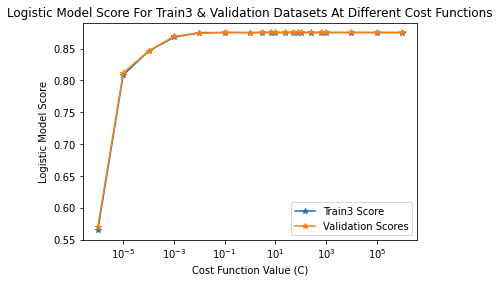

In [66]:
plt.figure()
plt.plot(C_range, train3_scores,label="Train3 Score",marker='*')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='*')
plt.xscale('log')
plt.xlabel('Cost Function Value (C)')
plt.ylabel('Logistic Model Score')
plt.title('Logistic Model Score For Train3 & Validation Datasets At Different Cost Functions')
plt.legend()
plt.show();

In [67]:
my_final_model = LogisticRegression(C=650,random_state=1,solver = 'lbfgs')
my_final_model.fit(X_train3,y_train3)
print(f"The logistic model had a score of {my_final_model.score(X_train3, y_train3)} on the scaled train3 dataset")

my_final_model = LogisticRegression(C=650,random_state=1,solver = 'lbfgs')
my_final_model.fit(X_validation,y_validation)
print(f"The logistic model had a score of {my_final_model.score(X_validation, y_validation)} on the scaled validation dataset")

The logistic model had a score of 0.8751154933462042 on the scaled train3 dataset
The logistic model had a score of 0.8763795488915345 on the scaled validation dataset


In [68]:
my_final_model.score(X_test3, y_test3)

0.8717800177654192

OG
***
The train3 score is 0.8751017030959112
*** 
the validation score is 0.8752212104636571.

KNN Model

In [75]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate model
KNN_model = KNeighborsClassifier(n_neighbors = 10)

# Fit model
KNN_model.fit(X_train3, y_train3)

# Print Train and Test accuracy
print("Number of neighbours: ", KNN_model.n_neighbors)
print("Train accuracy:", KNN_model.score(X_train3, y_train3))
print("Validation Accuracy", KNN_model.score(X_validation, y_validation))
print("Validation Accuracy", KNN_model.score(X_test3, y_test3))

Number of neighbours:  10
Train accuracy: 0.9347307453630284
Validation Accuracy 0.925094114997265
Validation Accuracy 0.9232224925655582


In [83]:
neighbors = range(1, 20, 2) # Only try odd numbers of neighbours

train3_acc = []
validation_acc = []

for n in neighbors:
    KNN_model = KNeighborsClassifier(n_neighbors = n)
    KNN_model.fit(X_train3, y_train3)
    
    train3_acc.append(KNN_model.score(X_train3, y_train3))
    validation_acc.append(KNN_model.score(X_validation, y_validation))

Text(0.5, 1.0, 'Train vs validation accuracy on different number of neighbours')

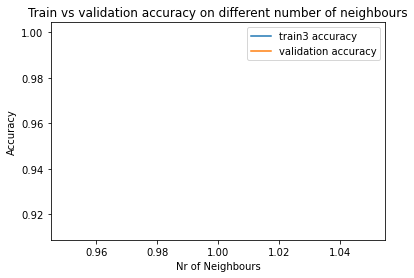

In [68]:
# Below I am plotting the results of the for loop above so we can visualisae the optimal value for K
plt.plot(neighbors, train3_acc, label = 'train3 accuracy')
plt.plot(neighbors, validation_acc, label = 'validation accuracy')
plt.xlabel('Nr of Neighbours')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train vs validation accuracy on different number of neighbours")

Decision Trees

In [74]:
# Below I am importing the relavent package
from sklearn.tree import DecisionTreeClassifier
# Below I am instantiating the decision tree model
dt_model = DecisionTreeClassifier(max_depth=1)
# Below I am fitting the decision tree model to the data
dt_model.fit(X_train3, y_train3)
# Below I am getting the score fo the decision tree model
dt_model.score(X_train3, y_train3)

0.7866786182169206

If we try to view the columns by scrolling horizontally we can't see all of them. The same is true if we use .columns as shown below: 

In [6]:
df_train.columns

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review',
       'lat', 'lng', 'weekday_of_review',
       ...
       'n_worry', 'n_worth', 'n_would', 'n_write', 'n_wrong', 'n_year',
       'n_yes', 'n_yet', 'n_young', 'rating'],
      dtype='object', length=2744)

Instead we can use the iloc method to identify the first x number of columns.

In [7]:
# Below I am viewing the first 13 columns of the train dataset.
df_train.iloc[:, : 13]

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,month_of_review,year_of_review,bed_single
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,1,2016,0
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,10,2016,0
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,3,2017,0
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,2,2017,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,11,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,68,7.8,2,264,20,2,185,51.522087,-0.108244,0,1,2017,0
12794,1172,7.8,10,5945,8,16,627,51.499981,-0.192879,6,11,2015,0
12795,562,8.5,0,1944,26,5,702,51.492418,-0.278470,1,9,2015,0
12796,154,8.0,13,768,6,2,24,51.512676,-0.186783,0,7,2017,0


In [8]:
# Below I am viewing the first 13 columns of the test dataset.
df_test.iloc[:, : 13]

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,month_of_review,year_of_review,bed_single
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,10,2016,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,7,2017,0
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,12,2015,0
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,11,2016,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,7,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,335,8.5,0,944,7,1,269,51.540394,-0.369758,0,11,2016,0
4263,406,8.2,72,2011,0,9,324,51.517972,-0.128049,1,9,2016,0
4264,581,8.4,16,1994,12,1,496,51.507894,-0.143671,4,3,2016,0
4265,620,9.0,58,1974,24,11,131,51.506558,-0.004514,5,3,2017,0


There are many takeaways from viewing the datasets:

- Both datasets have 2744 columns
- The train dataset has 12798 rows and the test dataset has 4267 rows. This means in total, the data has 17065 rows. Therefore the train - test split is a ~ 75:25 split
- The first 12 columns are the same for both datasets. This means the following 2732 columns are the count of each word for. both datasets

However, we know there is a 'Rating' column, but it's not showing up in the first 13 columns. Let's see where the rating column is.

In [9]:
# Below I am retrieving which column number the 'rating' column sits in
df_train.columns.get_loc("rating")
print(f" We know the shape of df_train is {len(df_train.columns)}. The column number of 'rating' is {df_train.columns.get_loc('rating')}")

 We know the shape of df_train is 2744. The column number of 'rating' is 2743


From the above, we can deduce that the rating column is the last column of the data frame. We confirm this below:

In [10]:
# Below I am retrieving the last column of the df_train dataframe
df_train.iloc[:,-1:]

,rating
0,1
1,1
2,1
3,0
4,0
...,...
12793,0
12794,0
12795,1
12796,0


We know the last column is indeed rating, but what about if other important columns are hidden in between column 12 and column 2743? Below we will look at every column name to ensure we are not missing anything:

In [11]:
# Below we are using a for loop to print out each column name from df_train.column
for col in df_train.columns:
    print(col)

Additional_Number_of_Scoring
Average_Score
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
days_since_review
lat
lng
weekday_of_review
month_of_review
year_of_review
bed_single
bed_double
bed_queen
bed_king
trip_leisure
trip_biz
group_solo
group_couple
group_family
Hotel_Name_11 Cadogan Gardens
Hotel_Name_41
Hotel_Name_88 Studios
Hotel_Name_Ace Hotel London Shoreditch
Hotel_Name_Adria Boutique Hotel
Hotel_Name_Aloft London Excel
Hotel_Name_Amba Hotel Charing Cross
Hotel_Name_Amba Hotel Marble Arch
Hotel_Name_Ambassadors Bloomsbury
Hotel_Name_Andaz London Liverpool Street
Hotel_Name_Apex City Of London Hotel
Hotel_Name_Apex London Wall Hotel
Hotel_Name_Apex Temple Court Hotel
Hotel_Name_Arbor City
Hotel_Name_Arbor Hyde Park
Hotel_Name_Ashburn Hotel
Hotel_Name_Avo Hotel
Hotel_Name_BEST WESTERN Maitrise Hotel Maida Vale
Hotel_Name_Baglioni Hotel London The Leading Hotels of the World
Hotel_Name_Batty La

From the above, we can confirm:
- there are no other columns to take note of apart from the count of each word in the reviews
- the count of each word in the review columns is listed alphabetically
- words from the positive review column start with p
- words from the negative review column start with n

## Scaling the DataFrames

Some models use euclidean distance. This means that if the scale of one feature is different to another then the weighting of each feature on the final model score will be unbalanced. Using a scaler can solve this issue.

All categorical columns are binary (so they don't require a scalar). This means the following numerical columns are why we should use a scaler:

- `days_since_review`
- `Review_Total_Negative_Word_Counts`
- `Total_Number_of_Reviews`
- `Review_Total_Positive_Word_Counts`
- `Total_Number_of_Reviews_Reviewer_Has_Given`

There are two types of scalers commonly used.
- StandardScaler() which is good if you don't have a max or min (for example, revenue of a company since it can in theory, be zero or infinite)
- MinMaxScaler() which is good if we know the data has a specific min and max value (for example, an IMDB rating since it can only ever be between 1 and 10)

Using a MinMaxScalar here wouldn't be optimal. This is because outliers can cause the scalar to 'squash' other data points together. Therefore we will use a StandardScalar on the aforementioned columns.

In [12]:
# Below I am importing the relavent transformers and scalers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Below I am passing the specified columns through a StandardScaler whilst leaving the remaining ones untouched
data = df_train

col_names = list(df_train)
features = data[col_names]


ct = ColumnTransformer([
        ('somename', StandardScaler(), ['days_since_review', 'Review_Total_Negative_Word_Counts','Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts','Total_Number_of_Reviews_Reviewer_Has_Given'])
    ], remainder='passthrough')

numeric_train_columns = ct.fit_transform(features)
numeric_train_columns

array([[ 0.98692261, -0.6320384 , -0.43496152, ...,  0.        ,
         0.        ,  1.        ],
       [-0.40660054, -0.43546272,  0.49126201, ...,  0.        ,
         0.        ,  1.        ],
       [-1.12285194, -0.56651317,  0.3342609 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.66906681, -0.6320384 , -0.44742192, ...,  0.        ,
         0.        ,  1.        ],
       [-1.63446009, -0.20612441, -0.93586985, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8115141 , -0.4027001 , -0.54170566, ...,  0.        ,
         0.        ,  1.        ]])

Above we see the result as an array. We want to see this in a dataframe format.

In [13]:
# Below I convert the array 'numeric_train_columns' to a DataFrame called 'df_train_numerical'
df_train_numerical = pd.DataFrame(numeric_train_columns)

df_train_numerical

,0,1,2,3,4,5,6,7,8,9,...,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743
0,0.986923,-0.632038,-0.434962,7.775616,-0.507382,620.0,9.0,51.506558,-0.004514,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.406601,-0.435463,0.491262,-0.655386,-0.010236,1258.0,9.4,51.502435,-0.000250,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.122852,-0.566513,0.334261,1.136202,-0.507382,995.0,8.1,51.504348,-0.033444,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.952316,-0.402700,-0.122621,-0.339224,0.611197,853.0,8.4,51.507377,0.038657,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.362102,-0.271650,1.489756,-0.444611,7.944100,1243.0,8.1,51.513556,-0.180002,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,-0.849994,-0.566513,-1.145205,0.187714,-0.383095,68.0,7.8,51.522087,-0.108244,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12794,1.303632,-0.304412,1.214381,-0.444611,1.356916,1172.0,7.8,51.499981,-0.192879,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12795,1.669067,-0.632038,-0.447422,0.503876,-0.010236,562.0,8.5,51.492418,-0.278470,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12796,-1.634460,-0.206124,-0.935870,-0.549999,-0.383095,154.0,8.0,51.512676,-0.186783,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Below I reset the index of 'df_train_numerical'
df_train_numerical.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743
0,0,0.986923,-0.632038,-0.434962,7.775616,-0.507382,620.0,9.0,51.506558,-0.004514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,-0.406601,-0.435463,0.491262,-0.655386,-0.010236,1258.0,9.4,51.502435,-0.000250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,-1.122852,-0.566513,0.334261,1.136202,-0.507382,995.0,8.1,51.504348,-0.033444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,-0.952316,-0.402700,-0.122621,-0.339224,0.611197,853.0,8.4,51.507377,0.038657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.362102,-0.271650,1.489756,-0.444611,7.944100,1243.0,8.1,51.513556,-0.180002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,12793,-0.849994,-0.566513,-1.145205,0.187714,-0.383095,68.0,7.8,51.522087,-0.108244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12794,12794,1.303632,-0.304412,1.214381,-0.444611,1.356916,1172.0,7.8,51.499981,-0.192879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12795,12795,1.669067,-0.632038,-0.447422,0.503876,-0.010236,562.0,8.5,51.492418,-0.278470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12796,12796,-1.634460,-0.206124,-0.935870,-0.549999,-0.383095,154.0,8.0,51.512676,-0.186783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We could try to replace all the column names and use df_train_numerical as the new df_train, but this is challenging. Instead, we can take the scaled numeric columns here and assign them to df_train. Then we can drop the non-scaled columns in df_train to have a correctly scaled training dataset.

In [15]:
# Below I assign the first 9 columns to a new DataFrame called 'df_train_num'
df_train_num = df_train_numerical.iloc[:, 0:9]
df_train_num

,0,1,2,3,4,5,6,7,8
0,0.986923,-0.632038,-0.434962,7.775616,-0.507382,620.0,9.0,51.506558,-0.004514
1,-0.406601,-0.435463,0.491262,-0.655386,-0.010236,1258.0,9.4,51.502435,-0.000250
2,-1.122852,-0.566513,0.334261,1.136202,-0.507382,995.0,8.1,51.504348,-0.033444
3,-0.952316,-0.402700,-0.122621,-0.339224,0.611197,853.0,8.4,51.507377,0.038657
4,1.362102,-0.271650,1.489756,-0.444611,7.944100,1243.0,8.1,51.513556,-0.180002
...,...,...,...,...,...,...,...,...,...
12793,-0.849994,-0.566513,-1.145205,0.187714,-0.383095,68.0,7.8,51.522087,-0.108244
12794,1.303632,-0.304412,1.214381,-0.444611,1.356916,1172.0,7.8,51.499981,-0.192879
12795,1.669067,-0.632038,-0.447422,0.503876,-0.010236,562.0,8.5,51.492418,-0.278470
12796,-1.634460,-0.206124,-0.935870,-0.549999,-0.383095,154.0,8.0,51.512676,-0.186783


In [16]:
# Below I assign each column in 'df_train_num' the correct column name
df_train_num.columns =['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review','lat','lng']

# Below I am looking at the shape of 'df_train_num'
df_train_num.shape

(12798, 9)

In [17]:
df_train.shape

(12798, 2744)

Above I confirm that both 'df_train_num' and 'df_train' have the same number of rows so they can be joined together.

In [18]:
# Below I use the 'pd.concat' function built into Pandas to concat both dataframes on the correct axis
frames = [df_train_num, df_train]
  
df_train = pd.concat(frames, axis=1)
display(df_train)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Additional_Number_of_Scoring,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,0.986923,-0.632038,-0.434962,7.775616,-0.507382,620.0,9.0,51.506558,-0.004514,620,...,0,0,0,0,0,0,0,0,0,1
1,-0.406601,-0.435463,0.491262,-0.655386,-0.010236,1258.0,9.4,51.502435,-0.000250,1258,...,0,0,0,0,0,0,0,0,0,1
2,-1.122852,-0.566513,0.334261,1.136202,-0.507382,995.0,8.1,51.504348,-0.033444,995,...,0,0,0,0,0,0,0,0,0,1
3,-0.952316,-0.402700,-0.122621,-0.339224,0.611197,853.0,8.4,51.507377,0.038657,853,...,0,0,0,0,0,0,0,0,0,0
4,1.362102,-0.271650,1.489756,-0.444611,7.944100,1243.0,8.1,51.513556,-0.180002,1243,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,-0.849994,-0.566513,-1.145205,0.187714,-0.383095,68.0,7.8,51.522087,-0.108244,68,...,0,0,0,0,0,0,0,0,0,0
12794,1.303632,-0.304412,1.214381,-0.444611,1.356916,1172.0,7.8,51.499981,-0.192879,1172,...,0,0,0,0,0,0,0,0,0,0
12795,1.669067,-0.632038,-0.447422,0.503876,-0.010236,562.0,8.5,51.492418,-0.278470,562,...,0,0,0,0,0,0,0,0,0,1
12796,-1.634460,-0.206124,-0.935870,-0.549999,-0.383095,154.0,8.0,51.512676,-0.186783,154,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_train.shape

(12798, 2753)

We added 9 additional columns to df_train, so we wanted to see the number of columns increase from 2744 to 2753. This sanity check confirms we have correctly added the scaled columns. Now we just need to drop the unscaled numerical columns. We have to be careful since some columns now have identical names.

In [20]:
# Below I remove duplicate columns
df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

In [21]:
# Below we can see the duplicated columns have been removed
for col in df_train.columns:
    print(col)

Additional_Number_of_Scoring
Average_Score
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
days_since_review
lat
lng
weekday_of_review
month_of_review
year_of_review
bed_single
bed_double
bed_queen
bed_king
trip_leisure
trip_biz
group_solo
group_couple
group_family
Hotel_Name_11 Cadogan Gardens
Hotel_Name_41
Hotel_Name_88 Studios
Hotel_Name_Ace Hotel London Shoreditch
Hotel_Name_Adria Boutique Hotel
Hotel_Name_Aloft London Excel
Hotel_Name_Amba Hotel Charing Cross
Hotel_Name_Amba Hotel Marble Arch
Hotel_Name_Ambassadors Bloomsbury
Hotel_Name_Andaz London Liverpool Street
Hotel_Name_Apex City Of London Hotel
Hotel_Name_Apex London Wall Hotel
Hotel_Name_Apex Temple Court Hotel
Hotel_Name_Arbor City
Hotel_Name_Arbor Hyde Park
Hotel_Name_Ashburn Hotel
Hotel_Name_Avo Hotel
Hotel_Name_BEST WESTERN Maitrise Hotel Maida Vale
Hotel_Name_Baglioni Hotel London The Leading Hotels of the World
Hotel_Name_Batty La

In [22]:
# Below I confirm that the non scaled columns were removed
df_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,0.986923,-0.632038,-0.434962,7.775616,-0.507382,620.0,9.0,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,-0.406601,-0.435463,0.491262,-0.655386,-0.010236,1258.0,9.4,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.122852,-0.566513,0.334261,1.136202,-0.507382,995.0,8.1,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.952316,-0.402700,-0.122621,-0.339224,0.611197,853.0,8.4,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1.362102,-0.271650,1.489756,-0.444611,7.944100,1243.0,8.1,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


Now I will repeat the same process with the 'df_test' dataset.

In [23]:
data = df_test

col_names = list(df_test)
features = data[col_names]

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['days_since_review', 'Review_Total_Negative_Word_Counts','Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts','Total_Number_of_Reviews_Reviewer_Has_Given'])
    ], remainder='passthrough')

numeric_test_columns = ct.fit_transform(features)


df_test_numerical = pd.DataFrame(numeric_test_columns)


df_test_numerical.reset_index()


df_test_num = df_test_numerical.iloc[:, 0:9]


df_test_num.columns =['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review','lat','lng']

df_test_num.shape

frames = [df_test_num, df_test]
  
df_test = pd.concat(frames, axis=1)

In [24]:
# Below I remove duplicate columns
df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()
df_test.head()


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,-0.286361,-0.663535,0.180130,-0.535822,-0.379881,1005.0,8.3,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.731894,0.907988,-0.506212,5.469905,-0.510015,487.0,8.8,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,1.159173,-0.663535,-0.294205,-0.379151,-0.510015,570.0,9.3,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.424500,-0.014428,3.764038,-0.849165,-0.379881,2623.0,8.7,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,0.088590,-0.219409,-0.604378,-0.849165,-0.379881,365.0,8.1,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Below I sanity check that the df_test dataframe is now scaled and correct
for col in df_test.columns:
    print(col)

Additional_Number_of_Scoring
Average_Score
Review_Total_Negative_Word_Counts
Total_Number_of_Reviews
Review_Total_Positive_Word_Counts
Total_Number_of_Reviews_Reviewer_Has_Given
days_since_review
lat
lng
weekday_of_review
month_of_review
year_of_review
bed_single
bed_double
bed_queen
bed_king
trip_leisure
trip_biz
group_solo
group_couple
group_family
Hotel_Name_11 Cadogan Gardens
Hotel_Name_41
Hotel_Name_88 Studios
Hotel_Name_Ace Hotel London Shoreditch
Hotel_Name_Adria Boutique Hotel
Hotel_Name_Aloft London Excel
Hotel_Name_Amba Hotel Charing Cross
Hotel_Name_Amba Hotel Marble Arch
Hotel_Name_Ambassadors Bloomsbury
Hotel_Name_Andaz London Liverpool Street
Hotel_Name_Apex City Of London Hotel
Hotel_Name_Apex London Wall Hotel
Hotel_Name_Apex Temple Court Hotel
Hotel_Name_Arbor City
Hotel_Name_Arbor Hyde Park
Hotel_Name_Ashburn Hotel
Hotel_Name_Avo Hotel
Hotel_Name_BEST WESTERN Maitrise Hotel Maida Vale
Hotel_Name_Baglioni Hotel London The Leading Hotels of the World
Hotel_Name_Batty La

## Dealing With Null Values

In [26]:
# Below I am making the  training data null value series = to the vairable 'train_nulls'
train_nulls = df_train.isna().any()

In [27]:
# Below I am counting the number of 'True' or 'False' occurances in the train dataset
train_nulls.value_counts()

False    2744
dtype: int64

In [28]:
# Below I am making the test data null value series = to the vairable 'test_nulls'
test_nulls = df_test.isna().any()

In [29]:
# Below I am counting the number of 'True' or 'False' occurances in the test dataset
test_nulls.value_counts()

False    2744
dtype: int64

Both datasets have 2744 columns. So we are looking for all of them to have no null values.

In other words, we want to see the count of false to = 2744 which luckily they do.

This means neither dataset contains null values.

## Question 4
#### What is the purpose of the validation set, i.e., how is it different than the test set?

## Splitting the data into test, train, validation datasets.

Train: This is the dataset we use to train the model.

Test: This is used to test the accuracy of our model on data it has never seen before

Validation: This is used to tune specific hyperparameters such as the cost function in logistic regression, the number of neighbours in KNN or the max_depth in decision trees. We make an assumption that the validation dataset is a good representation of the test dataset, so we use the validation set as a pseudo test dataset without actually revealing the test dataset to our model. This is important because by keeping the test set truly separate, we have a dataset we can truly 'test' our model on.

We aim to maximise the score of our model on the train and validation datasets while minimising the difference in the scores between the train and test datasets.

Generally speaking, the validation dataset is a subsection of the training dataset.

In [30]:
# Below I am setting our train dataset target y to 'rating'
y_train = df_train['rating']

# Below I am setting our train dataset data to every column besides 'rating'
X_train = df_train.drop('rating', axis = 1)

In [31]:
# Below I am spliting our df_train dataset into a train2 and validation dataset. The validation dataset will hold 30% of df_train's data
X_train2, X_validation, y_train2, y_validation = \
    train_test_split(X_train, y_train, test_size = 0.3,
            random_state=1)

In [32]:
# Below I am setting the test dataset target y to 'rating'
y_test= df_test['rating']

# Below I am setting the test dataset data to 'rating'
X_test = df_test.drop('rating', axis = 1)

In [33]:
print(f"The shape of X_train2 is {X_train2.shape} and the shape of y_train2 is {y_train2.shape}")
print("\n")
print(f"The shape of X_validation is {X_validation.shape} and the shape of y_validation is {y_validation.shape}")
print("\n")
print(f"The shape of X_test is {X_test.shape} and the shape of y_test is {y_test.shape}")
print("\n")

The shape of X_train2 is (8958, 2743) and the shape of y_train2 is (8958,)


The shape of X_validation is (3840, 2743) and the shape of y_validation is (3840,)


The shape of X_test is (4267, 2743) and the shape of y_test is (4267,)




This means our train2, validation, test split is as follows:
- train2 holds 52.49% of the total data
- validation holds 22.50% of the total data
- test holds 25.00% of the total data

## Question 1 part 1

#### Fit a logisitic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

If we apply a logistic model without using regularization then we get the follwing:

In [34]:
# Below I am importing the relavent library from sklearn to perform logistic regression
from sklearn.linear_model import LogisticRegression

# Below I am instantiating the model
LogReg = LogisticRegression(solver = 'lbfgs')

# Below I am fitting the logistic regression model to the training data
LogReg.fit(X_train2, y_train2)

print(f"The train2 score is {LogReg.score(X_train2, y_train2)} and the validation score is {LogReg.score(X_validation, y_validation)}.")

The train2 score is 0.7806430006697924 and the validation score is 0.76875.


To improve our model we can apply a cost function. But what should C be?

In [35]:
from sklearn.linear_model import LogisticRegression

# Below I create two empty lists which the matplotlib graph can be based on
validation_scores = []
train2_scores = []

# Below I have specified a series of C values
C_range = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 3, 7, 10, 25, 50, 75, 100, 250, 650, 1000, 10000])

# Below I create a for loop to run through thr above C values and append the values to the empty lists
for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train2, y_train2)
    
    # train on traning set
    train2_scores.append(my_logreg.score(X_train2, y_train2))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation, y_validation))

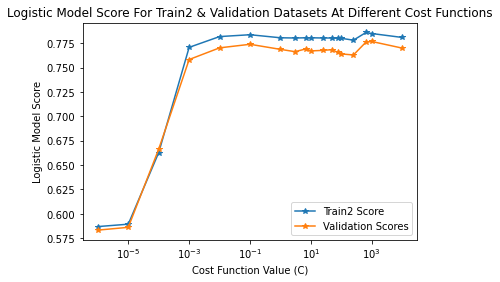

In [36]:
# Below I am plotting the values from the for loop above
plt.figure()
plt.plot(C_range, train2_scores,label="Train2 Score",marker='*')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='*')
plt.xscale('log')
plt.xlabel('Cost Function Value (C)')
plt.ylabel('Logistic Model Score')
plt.title('Logistic Model Score For Train2 & Validation Datasets At Different Cost Functions')
plt.legend()
plt.show();

Because we have already scaled the datset, the difference between the train2 and validation dataset scores is minimised. We can see that up to 10**-3 the level of overfitting and underfitting is extremely low. A C value of 650 has slight overfitting but it's the highest score, so this is our optimal C value.

In [37]:
my_final_model = LogisticRegression(C=650,random_state=1,solver = 'lbfgs')
my_final_model.fit(X_train2,y_train2)
print(f"The logistic model had a score of {my_final_model.score(X_train2, y_train2)} on the scaled train2 dataset")

my_final_model = LogisticRegression(C=650,random_state=1,solver = 'lbfgs')
my_final_model.fit(X_validation,y_validation)
print(f"The logistic model had a score of {my_final_model.score(X_validation, y_validation)} on the scaled validation dataset")

The logistic model had a score of 0.7861129716454566 on the scaled train2 dataset
The logistic model had a score of 0.7736979166666667 on the scaled validation dataset


After regulalrization we see that there is slightly less overfitting (previously the validation score was 0.76) and the train score has increased slightly by ~0.6.

In [38]:
my_final_model = LogisticRegression(C=650,random_state=1,solver = 'lbfgs')
my_final_model.fit(X_test,y_test)
print(f"The logistic model had a score of {my_final_model.score(X_test, y_test)} on the scaled test dataset")

The logistic model had a score of 0.7815795640965549 on the scaled test dataset


This means there was very minimal overfitting between the scaled train ans scaled test dataset.

## Question 1 Part 2

#### What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question.

Firstly we need to split up df_train and df_test into 4 dataframes where each dataframe holds words from either a positive or negative review.

In [39]:
# df_train_pos only includes words from the positive review column
df_train_pos = df_train.iloc[:, 417: 1400]
df_train_pos

,p_,p_02,p_1,p_10,p_100,p_11,p_12,p_15,p_1st,p_2,...,p_worth,p_would,p_wow,p_x,p_yard,p_year,p_yes,p_yet,p_young,p_yummy
0,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Below I am adding the rating column to df_train_pos
frames2 = [df_train_pos, df_train['rating']]
  
df_train_pos = pd.concat(frames2, axis=1)
df_train_pos.head()

,p_,p_02,p_1,p_10,p_100,p_11,p_12,p_15,p_1st,p_2,...,p_would,p_wow,p_x,p_yard,p_year,p_yes,p_yet,p_young,p_yummy,rating
0,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# df_train_neg only includes words from the negative review column
df_train_neg = df_train.iloc[:, 1401: 2743]
df_train_neg

,n_00,n_02,n_1,n_10,n_100,n_11,n_11am,n_11pm,n_12,n_15,...,n_world,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Below I am adding the rating column to df_train_neg
frames3 = [df_train_neg, df_train['rating']]
  
df_train_neg = pd.concat(frames3, axis=1)
df_train_neg.head()

,n_00,n_02,n_1,n_10,n_100,n_11,n_11am,n_11pm,n_12,n_15,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


df_train has been split into df_train_pos and df_train_neg.

The same needs to be done for df_test.

In [43]:
# df_test_pos only includes words from the positive review column
df_test_pos = df_test.iloc[:, 417: 1400]
df_test_pos

,p_,p_02,p_1,p_10,p_100,p_11,p_12,p_15,p_1st,p_2,...,p_worth,p_would,p_wow,p_x,p_yard,p_year,p_yes,p_yet,p_young,p_yummy
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4264,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4265,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# df_test_neg only includes words from the negative review column
df_test_neg = df_test.iloc[:, 1401: 2743]
df_test_neg

,n_00,n_02,n_1,n_10,n_100,n_11,n_11am,n_11pm,n_12,n_15,...,n_world,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Below I am adding the rating column to df_test_neg
frames4 = [df_test_neg, df_test['rating']]
  
df_test_neg = pd.concat(frames4, axis=1)
df_test_neg.head()

,n_00,n_02,n_1,n_10,n_100,n_11,n_11am,n_11pm,n_12,n_15,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Below I am adding the rating column to df_test_pos
frames5 = [df_test_pos, df_test['rating']]
  
df_test_pos = pd.concat(frames5, axis=1)
df_test_pos.head()

,p_,p_02,p_1,p_10,p_100,p_11,p_12,p_15,p_1st,p_2,...,p_would,p_wow,p_x,p_yard,p_year,p_yes,p_yet,p_young,p_yummy,rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have 4 dataframes

- df_train_pos
- df_train_neg

- df_test_pos
- df_test_neg

Each dataframe also has a corresponding rating column that we will use as our target.

### Splitting Each DataFrame into X and y

df_train_pos split

In [47]:
# Below I am setting our train dataset target y to 'rating'
y_train_pos = df_train_pos['rating']

# Below I am setting our train dataset data to every column besides 'rating'
X_train_pos = df_train_pos.drop('rating', axis = 1)

df_train_neg split

In [48]:
# Below I am setting our train dataset target y to 'rating'
y_train_neg = df_train_neg['rating']

# Below I am setting our train dataset data to every column besides 'rating'
X_train_neg = df_train_neg.drop('rating', axis = 1)

df_test_pos split

In [49]:
# Below I am setting our train dataset target y to 'rating'
y_test_pos = df_test_pos['rating']

# Below I am setting our train dataset data to every column besides 'rating'
X_test_pos = df_test_pos.drop('rating', axis = 1)

df_test_neg split

In [50]:
# Below I am setting our train dataset target y to 'rating'
y_test_neg = df_test_neg['rating']

# Below I am setting our train dataset data to every column besides 'rating'
X_test_neg = df_test_neg.drop('rating', axis = 1)

### Introducing a validation dataset

In [51]:
# Below I am spliting our df_train dataset into a train2 and validation dataset. The validation dataset will hold 30% of df_train's data
X_train_pos2, X_validation_pos, y_train_pos2, y_validation_pos = \
    train_test_split(X_train_pos, y_train_pos, test_size = 0.3,
            random_state=1)
print(f"X_train_pos2 has a shape of {X_train_pos2.shape}")
print(f"X_validation_pos has a shape of {X_validation_pos.shape}")

X_train_pos2 has a shape of (8958, 983)
X_validation_pos has a shape of (3840, 983)


In [52]:
# Below I am spliting our df_train dataset into a train2 and validation dataset. The validation dataset will hold 30% of df_train's data
X_train_neg2, X_validation_neg, y_train_neg2, y_validation_neg = \
    train_test_split(X_train_neg, y_train_neg, test_size = 0.3,
            random_state=1)
print(f"X_train_neg2 has a shape of {X_train_neg2.shape}")
print(f"X_validation_neg has a shape of {X_validation_neg.shape}")

X_train_neg2 has a shape of (8958, 1342)
X_validation_neg has a shape of (3840, 1342)


## Identifying the top 20 words with positive sentiment

### Leveraging a regression model

In [53]:
from sklearn.linear_model import LogisticRegression

# Below I create two empty lists which the matplotlib graph can be based on
validation_pos = []
train_pos = []

# Below I have specified a series of C values
C_range = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 3, 7, 10, 25, 50, 75, 100, 250, 650, 1000, 10000])

# Below I create a for loop to run through thr above C values and append the values to the empty lists
for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train_pos2, y_train_pos2)
    
    # train on traning set
    train_pos.append(my_logreg.score(X_train_pos2, y_train_pos2))
    # score on validation set
    validation_pos.append(my_logreg.score(X_validation_pos, y_validation_pos))

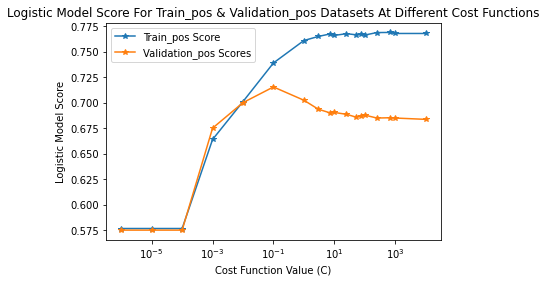

In [54]:
plt.figure()
plt.plot(C_range, train_pos,label="Train_pos Score",marker='*')
plt.plot(C_range, validation_pos,label="Validation_pos Scores",marker='*')
plt.xscale('log')
plt.xlabel('Cost Function Value (C)')
plt.ylabel('Logistic Model Score')
plt.title('Logistic Model Score For Train_pos & Validation_pos Datasets At Different Cost Functions')
plt.legend()
plt.show();

Our model does not perform as well as I would have hoped. We can see that at a C value of 0.01 the models have a good enough score but are importantly nearly the same. We will use 0.01 as our cost function.

In [55]:
# Below I am importing the relavent library from sklearn to perform logistic regression
from sklearn.linear_model import LogisticRegression

# Below I am instantiating the model
LogRegPos = LogisticRegression(solver = 'lbfgs', C=0.01)

# Below I am fitting the logistic regression model to the training data
LogRegPos.fit(X_train_pos2, y_train_pos2)
LogRegPos.fit(X_test_pos, y_test_pos)

print(f"The train_pos score is {LogRegPos.score(X_train_pos, y_train_pos)}")
print(f"The test_pos score is {LogRegPos.score(X_test_pos, y_test_pos)}")

The train_pos score is 0.6854977340209407
The test_pos score is 0.7000234356690883


With words from the positive review column, our training model slightly underfits but is close to the test score. Our score is still low but much better than a randomized guess.

### Using a CountVectorizer to Gather Sentiment

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(X_train_pos2)

# 3. Transform
X_train_pos_transformed = bagofwords.transform(X_train_pos2)
X_train_pos_transformed

<983x983 sparse matrix of type '<class 'numpy.int64'>'
	with 983 stored elements in Compressed Sparse Row format>

In [57]:
X_test_pos_transformed = bagofwords.transform(X_test_pos)
X_test_pos_transformed

<983x983 sparse matrix of type '<class 'numpy.int64'>'
	with 983 stored elements in Compressed Sparse Row format>

### Plotting the results from the transformed CountVectorizer

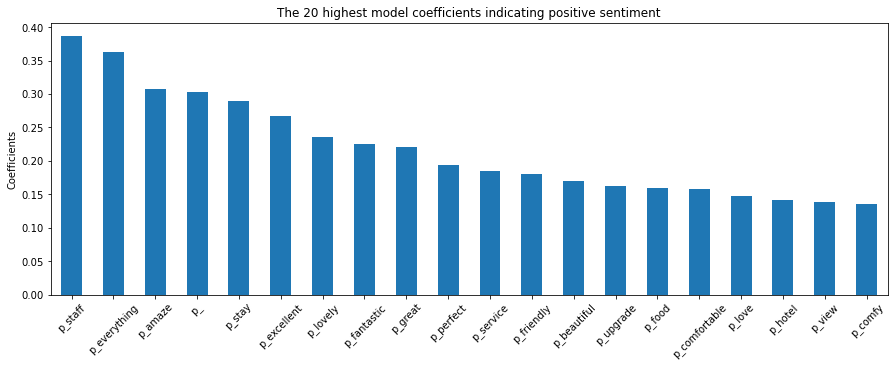

In [58]:
word_counts_pos = pd.DataFrame(
    {"coefficients": LogRegPos.coef_[0]},
    index=bagofwords.get_feature_names()
).sort_values("coefficients", ascending=False)

word_counts_pos.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

## Identifying the top 20 words with negative sentiment

### Leveraging a regression model

In [59]:
from sklearn.linear_model import LogisticRegression

# Below I create two empty lists which the matplotlib graph can be based on
validation_neg = []
train_neg = []

# Below I have specified a series of C values
C_range = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 3, 7, 10, 25, 50, 75, 100, 250, 650, 1000, 10000])

# Below I create a for loop to run through thr above C values and append the values to the empty lists
for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train_neg2, y_train_neg2)
    
    # train on traning set
    train_neg.append(my_logreg.score(X_train_neg2, y_train_neg2))
    # score on validation set
    validation_neg.append(my_logreg.score(X_validation_neg, y_validation_neg))

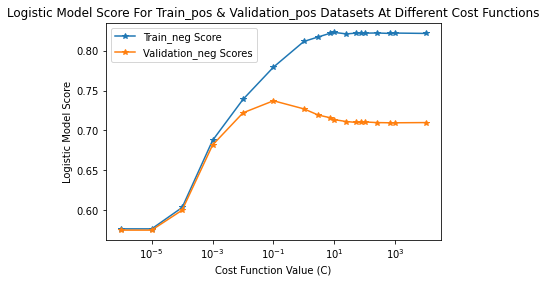

In [60]:
plt.figure()
plt.plot(C_range, train_neg,label="Train_neg Score",marker='*')
plt.plot(C_range, validation_neg,label="Validation_neg Scores",marker='*')
plt.xscale('log')
plt.xlabel('Cost Function Value (C)')
plt.ylabel('Logistic Model Score')
plt.title('Logistic Model Score For Train_pos & Validation_pos Datasets At Different Cost Functions')
plt.legend()
plt.show();

Again we see that a C of 0.01 is optimal.

In [61]:
# Below I am importing the relavent library from sklearn to perform logistic regression
from sklearn.linear_model import LogisticRegression

# Below I am instantiating the model
LogRegNeg = LogisticRegression(solver = 'lbfgs', C=0.01)

# Below I am fitting the logistic regression model to the training data
LogRegNeg.fit(X_train_neg2, y_train_neg2)
LogRegNeg.fit(X_test_neg, y_test_neg)

print(f"The train_neg score is {LogRegNeg.score(X_train_neg2, y_train_neg2)}")
print(f"The test_neg score is {LogRegNeg.score(X_test_neg, y_test_neg)}")

The train_neg score is 0.7136637642330877
The test_neg score is 0.7283805952659949


### Leveraging a CountVectorizer

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(X_train_neg2)

# 3. Transform
X_train_neg_transformed = bagofwords.transform(X_train_neg2)
X_train_neg_transformed

<1342x1342 sparse matrix of type '<class 'numpy.int64'>'
	with 1342 stored elements in Compressed Sparse Row format>

In [63]:
X_test_neg_transformed = bagofwords.transform(X_test_neg)
X_test_neg_transformed

<1342x1342 sparse matrix of type '<class 'numpy.int64'>'
	with 1342 stored elements in Compressed Sparse Row format>

### Plotting the results from the transformed CountVectorizer

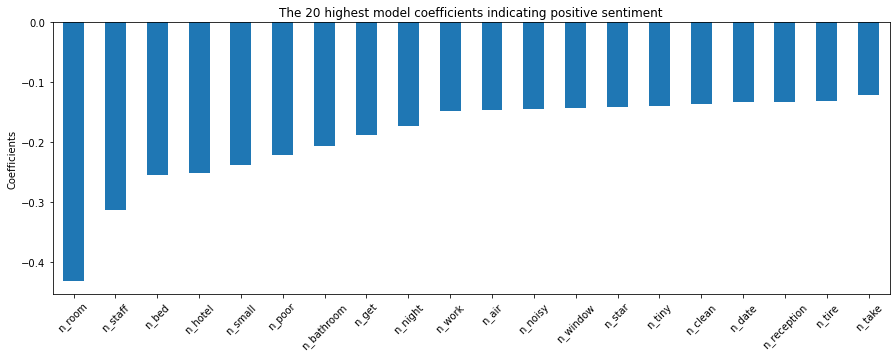

In [64]:
word_counts_neg = pd.DataFrame(
    {"coefficients": LogRegNeg.coef_[0]},
    index=bagofwords.get_feature_names()
).sort_values("coefficients", ascending=True)

word_counts_neg.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

## Question 1 Part 3

#### Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

Multicollinearity occurs when features (input variables) are highly correlated with one or more of the other features in the dataset. It affects the performance of regression and classification models. PCA (Principal Component Analysis) takes advantage of multicollinearity and combines the highly correlated variables into a set of uncorrelated variables. Therefore, PCA can effectively eliminate multicollinearity between features.

In [65]:
# Remove the hastags and run to see the correlation between different features
import seaborn as sns
#import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(25, 20))
sns.heatmap(df_train.corr(), annot=True

In [66]:
# Below I am importing the PCA pcakage
from sklearn.decomposition import PCA

In [67]:
print("There are", X_train_pos2.shape[0], 'data points, each with', X_train_pos2.shape[1], 'features.')

There are 8958 data points, each with 983 features.


In [68]:
# Below I am instantiating the PCA model 
my_pca = PCA()
# Below I am fitting the model to the positive word sentiment data
my_pca.fit(X_train_pos2)

# Below I am transforming the data
X_train_PCA = my_pca.transform(X_train_pos2)
X_test_PCA = my_pca.transform(X_test_pos)

In [69]:
print(f"Variance captured by PC1: {my_pca.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_pca.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_pca.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_pca.explained_variance_ratio_[1]: 0.3f}")

Variance captured by PC1:  0.698
Variance captured by PC2:  0.336
Proportion of variance captured by PC1:  0.079
Proportion of variance captured by PC2:  0.038


In [70]:
my_pca.explained_variance_ratio_

array([7.93957194e-02, 3.82460314e-02, 3.39047016e-02, 3.00789427e-02,
       2.82748027e-02, 2.60834393e-02, 2.08197375e-02, 1.82847150e-02,
       1.61936428e-02, 1.51994999e-02, 1.36616636e-02, 1.31132243e-02,
       1.24157994e-02, 1.15104041e-02, 1.12181397e-02, 1.11796291e-02,
       1.03543805e-02, 9.75532132e-03, 8.85704148e-03, 7.63325809e-03,
       7.54003819e-03, 7.03623011e-03, 6.46278002e-03, 6.26273448e-03,
       6.25421492e-03, 5.73514669e-03, 5.67237280e-03, 5.46239733e-03,
       5.30677910e-03, 5.06719184e-03, 4.89983488e-03, 4.82799587e-03,
       4.76538252e-03, 4.69283697e-03, 4.58126654e-03, 4.46778680e-03,
       4.35056389e-03, 4.28497194e-03, 4.21276574e-03, 4.20330298e-03,
       4.11285743e-03, 4.06561488e-03, 3.96183659e-03, 3.94681338e-03,
       3.91685580e-03, 3.83862306e-03, 3.76902664e-03, 3.74247497e-03,
       3.64748536e-03, 3.45179197e-03, 3.38952387e-03, 3.33769808e-03,
       3.30783288e-03, 3.29197599e-03, 3.25175368e-03, 3.21290638e-03,
      

In [71]:
expl_var = my_pca.explained_variance_ratio_

TypeError: can only concatenate str (not "int") to str

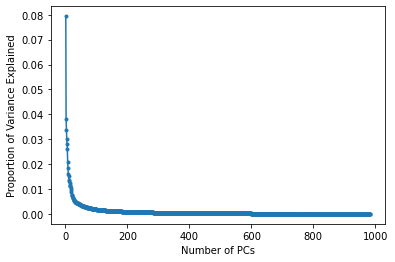

In [72]:
# The plot below allows us to idenitfy how many PC components we should input into our model
plt.figure()
plt.plot(range(1,984),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(np.arange(min(X_train_pos2), max(X_train_pos2)+2, 1.0))
plt.show()

We can see that ~30 PC's is the optimal number.

In [ ]:
# Instantiate and fit with the specieid 30 PC's
my_pca = PCA(n_components = 30)
my_pca.fit(X_train_pos2)

# Transform train and test
X_train_PCA = my_pca.transform(X_train_pos2)
X_test_PCA = my_pca.transform(X_test_pos)

In [ ]:
print(f'Original: {X_train.shape}')
print(f'PCA Transformed: {X_train_PCA.shape}')

By using PCA:
- We have reduced the number of columns by 98% 
- We have reduced the number of rows by 30%

Below we will identify to what score the PCA data will achieve and how close to the origional it is.

In [ ]:
my_logreg_PCA = LogisticRegression()

In [ ]:
# Fitting to PCA data
my_logreg_PCA.fit(X_train_PCA,y_train_pos2)

In [ ]:
print("These are the PCA scores:")
print(f'Train Score: {my_logreg_PCA.score(X_train_PCA,y_train_pos2)}')
print(f'Test Score: {my_logreg_PCA.score(X_test_PCA,y_test_pos)}')

In [ ]:
print("These are the original scores")
print(f"The train_pos score is {LogRegPos.score(X_train_pos, y_train_pos)}")
print(f"The test_pos score is {LogRegPos.score(X_test_pos, y_test_pos)}")

We can see that the PCA score is similar to the original score except the test score has reduced from 0.7 to 0.68.

In [ ]:
my_pca.components_

### Computational Speed

Below is the PCA run time:

In [ ]:
%%timeit
my_logreg_PCA.fit(X_train_PCA,y_train_pos2)

Below is the original model run time:

In [ ]:
%%timeit
LogRegPos.score(X_train_pos, y_train_pos)

We can see that run time has been reduced by ~30%. Working with large datasets could be useful. However, in our scenario, we also lost 30% of test score accuracy with a small increase in real running time, so it's not worth it.

## Question 1 Part 4

#### List one advantage and one disadvantage of dimensionality reduction

The main advantage of PCA is data compression. This means
- The file takes up less storage space
- Models will run faster (reduces computation time) since the number of features is drastically reduced, and correlated columns are removed. This is especially useful in unsupervised learning, where reducing the training time of a model can have a compounding effect.

A key disadvantage of PCA is that it's very prone to feature weighting issues of the data is not already standardised:
- If units are in Mg, Kg or millions then the variance scale is massive. If PCA was applied on such a feature set, the results for features with high variance will also be large. This means principal components will be biased towards features with high variance, leading to false results.
- Categorical columns would be required to become numerical ones (e.g. binary)

## Question 2 Part 1

#### Fit a KNN model to this data. What is the accuracy score on the test set?


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate model
KNN_model = KNeighborsClassifier(n_neighbors = 10)

# Fit model
KNN_model.fit(X_train_pos2, y_train_pos2)

# Print Train and Test accuracy
print("Number of neighbours: ", KNN_model.n_neighbors)
print("Train accuracy:", KNN_model.score(X_train_pos2, y_train_pos2))
print("Validation Accuracy", KNN_model.score(X_validation_pos, y_validation_pos))

In [ ]:
print("These are the original regression model scores")
print(f"The train_pos score is {LogRegPos.score(X_train_pos, y_train_pos)}")
print(f"The validation_pos score is {LogRegPos.score(X_validation_pos, y_validation_pos)}")

Wee see that the KNN model does a worse job than the original logistic regression model:
- Our training accuracy has reduced by 3.7% 
- Our validation accuracy has reduced by 12.7%

We also see that the KNN model is overfitting.

However, this was using a random 'nearest neighbor parameter' of 10. We can improve the model score and/or reduce overfitting by optimising this hyperparameter.

## Question 2 Part 4

#### Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets

In [ ]:
neighbors = range(1, 50, 2) # Only try odd numbers of neighbours

train_acc = []
validation_acc = []

for n in neighbors:
    KNN_model = KNeighborsClassifier(n_neighbors = n)
    KNN_model.fit(X_train_pos2, y_train_pos2)
    
    train_acc.append(KNN_model.score(X_train_pos2, y_train_pos2))
    validation_acc.append(KNN_model.score(X_validation_pos, y_validation_pos))

In [ ]:
# Below I am plotting the results of the for loop above so we can visualisae the optimal value for K
plt.plot(neighbors, train_acc, label = 'train accuracy')
plt.plot(neighbors, validation_acc, label = 'validation accuracy')
plt.xlabel('Nr of Neighbours')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train vs validation accuracy on different number of neighbours")

We can see in the plot above:
- an inverse relationship between the level of overfitting and an increase in the value of K. 
- an inverse relationship between the level of overfitting and increase in the average model score of both the train and validation dataset. 

The level of overfitting reduces significantly in the beginning, but after a K value of 27, there is only a minor compounding reduction in overfitting. I believe the optimal value to:
- Reduce the level of overfitting
- Maximise the score of the model

Therefore I am selecting the optimal value of K as 29.

In [ ]:
# Instantiate model
KNN_model = KNeighborsClassifier(n_neighbors = 29)

# Fit model
KNN_model.fit(X_train_pos2, y_train_pos2)

# Print Train and Test accuracy
print("Number of neighbours: ", KNN_model.n_neighbors)
print("Train accuracy:", KNN_model.score(X_train_pos2, y_train_pos2))
print("Validation Accuracy", KNN_model.score(X_validation_pos, y_validation_pos))

The prior KNN model produced the following results:
- Number of neighbours:  10
- Train accuracy: 0.6601920071444519
- Validation Accuracy 0.5997395833333333

The origional logistic model produced the following results:

In [ ]:
print("These are the original regression model scores")
print(f"The train_pos score is {LogRegPos.score(X_train_pos, y_train_pos)}")
print(f"The validation_pos score is {LogRegPos.score(X_validation_pos, y_validation_pos)}")

The KNN model still underperforms compared to the original regression model, but now we have less overfitting compared to the prior KNN model.

## Question 2 Part 2
#### KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?

First we need to create new dataframes which hold varying amounts of the original data.

We already have: X_train_pos2 & y_train_pos2 which have 100% of the data

2% of the data

In [ ]:
X_train_pos2_2 = X_train_pos2.sample(frac=0.02)
y_train_pos2_2 = y_train_pos2.sample(frac=0.02)

In [ ]:
print(f"The shape of X_train_pos2_2 is {X_train_pos2_2.shape} and the shape of y_train_pos2_2 is {y_train_pos2_2.shape}.")

5% of data

In [ ]:
X_train_pos2_5 = X_train_pos2.sample(frac=0.05)
y_train_pos2_5 = y_train_pos2.sample(frac=0.05)

In [ ]:
print(f"The shape of X_train_pos2_5 is {X_train_pos2_5.shape} and the shape of y_train_pos2_5 is {y_train_pos2_5.shape}.")

10% of data

In [ ]:
X_train_pos2_10 = X_train_pos2.sample(frac=0.1)

In [ ]:
y_train_pos2_10 = y_train_pos2.sample(frac=0.1)

In [ ]:
print(f"The shape of X_train_pos2_10 is {X_train_pos2_10.shape} and the shape of y_train_pos2_10 is {y_train_pos2_10.shape}.")

20% of data

In [ ]:
X_train_pos2_20 = X_train_pos2.sample(frac=0.2)
y_train_pos2_20 = y_train_pos2.sample(frac=0.2)

In [ ]:
print(f"The shape of X_train_pos2_20 is {X_train_pos2_20.shape} and the shape of y_train_pos2_20 is {y_train_pos2_20.shape}.")

30% of data

In [ ]:
X_train_pos2_30 = X_train_pos2.sample(frac=0.3)
y_train_pos2_30 = y_train_pos2.sample(frac=0.3)

In [ ]:
print(f"The shape of X_train_pos2_30 is {X_train_pos2_30.shape} and the shape of y_train_pos2_30 is {y_train_pos2_30.shape}.")

40% of data

In [ ]:
X_train_pos2_40 = X_train_pos2.sample(frac=0.4)
y_train_pos2_40 = y_train_pos2.sample(frac=0.4)

In [ ]:
print(f"The shape of X_train_pos2_40 is {X_train_pos2_40.shape} and the shape of y_train_pos2_40 is {y_train_pos2_40.shape}.")

50% of data

In [ ]:
X_train_pos2_50 = X_train_pos2.sample(frac=0.5)
y_train_pos2_50 = y_train_pos2.sample(frac=0.5)

In [ ]:
print(f"The shape of X_train_pos2_50 is {X_train_pos2_50.shape} and the shape of y_train_pos2_50 is {y_train_pos2_50.shape}.")

60% of data

In [ ]:
X_train_pos2_60 = X_train_pos2.sample(frac=0.6)
y_train_pos2_60 = y_train_pos2.sample(frac=0.6)

In [ ]:
print(f"The shape of X_train_pos2_60 is {X_train_pos2_60.shape} and the shape of y_train_pos2_60 is {y_train_pos2_60.shape}.")

70% of data

In [ ]:
X_train_pos2_70 = X_train_pos2.sample(frac=0.7)
y_train_pos2_70 = y_train_pos2.sample(frac=0.7)

In [ ]:
print(f"The shape of X_train_pos2_70 is {X_train_pos2_70.shape} and the shape of y_train_pos2_70 is {y_train_pos2_70.shape}.")

80% of data

In [ ]:
X_train_pos2_80 = X_train_pos2.sample(frac=0.8)
y_train_pos2_80 = y_train_pos2.sample(frac=0.8)

In [ ]:
print(f"The shape of X_train_pos2_80 is {X_train_pos2_80.shape} and the shape of y_train_pos2_80 is {y_train_pos2_80.shape}.")

90% of data

In [ ]:
X_train_pos2_90 = X_train_pos2.sample(frac=0.9)
y_train_pos2_90 = y_train_pos2.sample(frac=0.9)

In [ ]:
print(f"The shape of X_train_pos2_90 is {X_train_pos2_90.shape} and the shape of y_train_pos2_90 is {y_train_pos2_90.shape}.")

Nowe we have several datasets at varying percentages of the main dataset. Now we can see how long it takes to put each dataset through a KNN model.

100% of the dataset:

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2, y_train_pos2)
KNN_model.score(X_train_pos2, y_train_pos2)

90% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_90, y_train_pos2_90)
KNN_model.score(X_train_pos2_90, y_train_pos2_90)

80% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_80, y_train_pos2_80)
KNN_model.score(X_train_pos2_80, y_train_pos2_80)

70% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_70, y_train_pos2_70)
KNN_model.score(X_train_pos2_70, y_train_pos2_70)

60% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_60, y_train_pos2_60)
KNN_model.score(X_train_pos2_60, y_train_pos2_60)

50% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_50, y_train_pos2_50)
KNN_model.score(X_train_pos2_50, y_train_pos2_50)

40% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_40, y_train_pos2_40)
KNN_model.score(X_train_pos2_40, y_train_pos2_40)

30% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_30, y_train_pos2_30)
KNN_model.score(X_train_pos2_30, y_train_pos2_30)

20% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_20, y_train_pos2_20)
KNN_model.score(X_train_pos2_20, y_train_pos2_20)

10% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_10, y_train_pos2_10)
KNN_model.score(X_train_pos2_10, y_train_pos2_10)

5% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_5, y_train_pos2_5)
KNN_model.score(X_train_pos2_5, y_train_pos2_5)

2% of dataset

In [ ]:
%%timeit
KNN_model = KNeighborsClassifier(n_neighbors = 29)
KNN_model.fit(X_train_pos2_2, y_train_pos2_2)
KNN_model.score(X_train_pos2_2, y_train_pos2_2)

Percentage of dataset, the corresponding of run time and the percentage change from the previous percentage:
- 100: 4.91s
- 90: 4.08s: -16.90%
- 80: 3.22s: -21.08%
- 70: 2.56s: -20.50%
- 60: 1.54s: -39.84%
- 50: 1.07s: -30.52%
- 40: 0.77s: -28.04%
- 30: 0.45s: -41.56%
- 20: 0.18s: -60.00%
- 10: 0.26s: 44.44%
- 5: 0.05s: -80.77%
- 2: 0.02s: -60.00%

We can see from the above that reducing the number of data points: (Except when the dataset is 10% which seems to be an anomaly)
- correlates to a reduction in run time. The smaller the number of data points, the larger the reduction in run time in % terms
- it initially results in a large reduction in real run time, but over time the real run time reduces less and less

## Question 2 Part 3
#### List one advantage and one disadvantage of reducing the number of observations.

One advantage is that the run time of the model decreases. This is because the number of data points the KNN model has to classify reduces accordingly.

One disadvantage is that a certain amount of data is required for the KNN model to score well. When there are too few data points, the model will have fewer data points to compare against other data points it is classifying. This would lead to data points having a higher chance of being incorrectly classified and the model score overall dropping.

So overall, reducing the number of observations can be helpful if the model score doesn't drop much, but at a certain point, the drop in model score outweighs the benefit of the model running slightly faster.

## Question 2 Part 5
#### What is the issue with splitting the data into train and validation sets after performing vectorization?

The reason we split up data into test and train is so we have unseen data we can run our model on.

The reason why we utilise a validation dataset (which is a subsection of the training data before any processing has occurred) is to have the opportunity to optimise any hyperparameters without the use of a test dataset.

If we use the test dataset to optimise parameters, then when we eventually run the model through the test dataset, we can't truly say the model has never been seen (and thus learnt from it) before. 

Given the above, it's important that training data stay in the training dataset, test data stay in the test dataset, and validation data stay in the validation dataset. If, after performing a vectorisation we split the dataset, then we have minimised the value of this said validation dataset. This is because a vectoriser has already been passed through the data with other training data. We can no longer truely view the validation dataset as a dataset to optimise hyperparameters.

## Question 3 Part 1
#### Fit a decision tree model to this data. What is the accuracy score on the test set?

In [ ]:
# Below I am importing the relavent package
from sklearn.tree import DecisionTreeClassifier
# Below I am instantiating the decision tree model
dt_model = DecisionTreeClassifier(max_depth=1)
# Below I am fitting the decision tree model to the data
dt_model.fit(X_train_pos2, y_train_pos2)
# Below I am getting the score fo the decision tree model
dt_model.score(X_train_pos2, y_train_pos2)

Considering that a score of 0.5 is a random guess, we can conclude that the above model doesn't perform very well. It's below the logisitc and KNN models we tried.

But I used a max_depth of 1. max_depth is used ot limit the amount of splitting of nodes in a decision tree model.

We can improve the model by finding the optimal max depth.

## Question 3 Part 2
#### Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

In [ ]:
scores = pd.DataFrame()

for i in range(1, 20):
    dt_model = DecisionTreeClassifier(max_depth=i)
    dt_model.fit(X_train_pos2, y_train_pos2)

    scores = scores.append({'Depth': i, 
                   'Train_Score': dt_model.score(X_train_pos2, y_train_pos2), 
                   'Validation_Score': dt_model.score(X_validation_pos, y_validation_pos)},
                 ignore_index = True)
    
scores

In [ ]:
# Importing packages
import matplotlib.pyplot as plt

# Define data values
x = [7, 14, 21, 28, 35, 42, 49]
y = [5, 12, 19, 21, 31, 27, 35]
z = [3, 5, 11, 20, 15, 29, 31]

# Plot a simple line chart
plt.plot(x, y)

# Plot another line on the same chart/graph
plt.plot(x, z)

plt.show()

In [ ]:
plt.plot(scores.Depth, scores.Train_Score, label = 'Train accuracy')
plt.plot(scores.Depth, scores.Validation_Score, label = 'Validation accuracy')
plt.xlabel('Max_Depth')
plt.ylabel('DT_Model_Accuracy')
plt.legend()
plt.title("Decision Tree Model Accuracy at different Max_Depths")

From the above plot we can see:
- after a max_depth of 7 the level of overfitting inreases significantly
- before a max_depth of 5 there is underfitting

Therefore a max_depth of 6 looks optimal.

In [ ]:
# Below I am importing the relavent package
from sklearn.tree import DecisionTreeClassifier
# Below I am instantiating the decision tree model
dt_model = DecisionTreeClassifier(max_depth=6)
# Below I am fitting the decision tree model to the data
dt_model.fit(X_train_pos2, y_train_pos2)
# Below I am getting the score fo the decision tree model
dt_model.score(X_train_pos2, y_train_pos2)

Considering the prior score was 0.58428220584952 this is a good improvement.

This puts it inline with the score from the KNN model (0.66) but below that of the logistic regression (0.68).

## Question 3 Part 3
#### Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

Advantage 1: Decision trees are generally faster and more efficient when running vs KNN models. This is especially true for larger datasets where KNN models need to scan the entire dataset to make a prediction whereas a decision tree model can generalise the data in advance. This is why KNN is known as a computationally expensive algorithm.

Advantage 2: Less data preparation is required for decision tree models to run well. Decision trees predict a class for a given input vector, which may be a numeric or nominal attribute. With KNN models, it classifies based on the distance which means that each feature must be numeric. Also, distance metrics can be impacted more by varying scales of features (if not scaled).

Disadvantage 1: Decision trees are less stable. A small variation in the data could result in a different tree being generated. Or a small change in the data can cause a large change in the final estimated tree.

Disadvantage 2: Decision trees are more liberal with the data they can take in but can require more hyper-parameter tuning. For example, max_depth and max_leaf nodes (pruning) need to be optimised to avoid overfitting, which decision trees are indeed more prone to.

## Question 5 Part 1
#### Perform a 5-fold cross validation to optimize the hyperparameters of your model.

When we create a validation dataset, we get a random % of the total dataset. This random chunk will contain different data points even if it contains the same number of classes. This will impact the score a model displays when the validation data is passed through it. K fold allows us to visualise this and select the optimum hyperparameters for all possible folds.

In [ ]:
# Below I am importing the relavent package
from sklearn.model_selection import cross_val_score

# Below I am instantiating the model
my_logreg = LogisticRegression(random_state=1)
# Below I am fitting the model on 5 folds
scores = cross_val_score(my_logreg, X_validation_pos, y_validation_pos, cv = 5)
print(scores)

We can see each K fold score more clearly below:

In [ ]:
for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")

We can see above that depending on what split of the training data we get by chance, we get a varying logistic regression model score. We can take an average of all the folds as shown below:

In [ ]:
print(f"Average Score:{np.mean(scores)}")

We can specify the optimal C value for the average of all 5 folds below:

In [ ]:
# Below I create an empty list to store the results of the for loop that we can plot
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Below i use cross validation and a for loop to run each fold through the logistic regression at each C value
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model, X_validation_pos, y_validation_pos, cv = 5))
    
    cross_validation_scores.append(cv_score)
    

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.title("Cross Validation Scores at varying C values")
plt.grid()
plt.show();

Since we have taken into account 5 splits of our dataset, we can simply select the C value where the score is the highest. In this situation it would be a C value of 10**-1 i.e. 0.1

## Question 5 Part 2
#### What does your confusion matrix look like for your best model on the test set?

Our model can be highly accurate, but the following can occur:
- We can incorrectly classify data points as having a specific sentiment when they don't
- We can incorrectly classify datapoints as not having a specific sentiment when they do

On the surface, this seems harmless. If 99% of our data is classified correctly, what is a few misclassifications? 

In some cases, misclassifying can have serious implications, like identifying who has cancer or who is attempting to conduct fraud. 

If we accidentally suspect an individual is conducting fraud and pass them through further checks, this may not be optimal, but it wouldn't be a huge issue. On the other hand, not classifying a fraudster as conducting fraud could cost a bank significant levels of revenue. 

A confusion matrix allows us to move beyond a model's score and identify the impact of the model's mistakes.

In [ ]:
# 1 Below I am instantiating the model
hotel_logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=10000)

# 2. Below I am fitting the model
hotel_logit.fit(X_train_pos2, y_train_pos2);

In [ ]:
print(f'Score on train: {hotel_logit.score(X_train_pos2, y_train_pos2)}')
print(f'Score on test: {hotel_logit.score(X_validation_pos, y_validation_pos)}')

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# Below I cam geetting the class prediction
y_pred = hotel_logit.predict(X_test_pos)

# Below I am creating the confusion matrix and filling it with our data
cf_matrix = confusion_matrix(y_test_pos, y_pred)

# Below I am proposing the correct column and row names
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["True Positive", "False Positive"],
    index=["False Negative", "True Negative"]
)

print(cf_df)

In [ ]:
plot_confusion_matrix(
    hotel_logit, 
    X_test_pos, 
    y_test_pos, 
    display_labels=['Not_Positive_Sentiment', 'Positive_Sentiment'], 
    cmap='Blues', 
    normalize=None,
    values_format='.0f',
    xticks_rotation='vertical'
    )
plt.show()

The logistic model overfitted but had a test score of 0.7. This is not a very high score so we can expect the model to misclassify many datapoints.

In our case:
- We are classifying 542 datapoints incorrectly as having a specific sentiment (15%)
- We are incorrectly classifying 648 datapoints as not having a specific sentiment (15.8%)

This suggests that our model is not very good but luckily the impact of a datapoint in our dataset being classified cinorrectly doesn't have a serious impact (relatively speaking).

## Question 6 Part 1
#### Explain your new feature and why you consider it will improve accuracy.

First I will investigate the original 'df_train' that was scaled to see what new valuable feature I can add.

In [ ]:
df_train.iloc[:, : 13]

Please note I am defining the columns as following
- 'Average_Score' is the average score from the reviewer across all hotels they have reviewed (if this were the average score of the hotel, it would have a near-perfect correlation to the rating column)
- 'Total_Number_of_Reviews' is the total number of reviews the hotel has received 

*** I am assuming that using the rating column as part of the feature engineering would be unfair since the rating column perfectly correlated to itself

In general, services or products that receive a large number of reviews will be higher rated than those that have few reviews.

This is because a service or product that has very low reviews tends to have little demand when consumers have more information on how bad the service or product is. This doesn't mean that a high number of reviews has a linear relationship to rating, but there is some correlation. (the more correlation, the more impactful this new feature will be)

The average number of reviews from each reviewer is ~741, which is significant. But regardless, assuming a normal distribution means that 95% of the reviews will be within 95% of the average score. This means whilst, in some situations, a reviewer's average score may be very different from a specific hotel rating, in general, it will not. This suggests that the average score is somewhat correlated with a hotel's individual score. By extension, this suggests that the average score is somewhat correlated with the rating.

By multiplying these columns together, we create a 'hotel score'. Here the hypothesis is that the higher the hotel score, the more likely the hotel to be rated as a 'good hotel' (a 1 in the rating column). It also places more significance on these two columns when running models.

In [81]:
# Below I am identifying the average number of total reviews given
df_train['Total_Number_of_Reviews_Reviewer_Has_Given'].mean()

741.0612595718081

In [82]:
# Below I am creating the new 'Hotel_Score' column by multiplying the average score and total number of reviews columns together
df_train_pos['Hotel_Score'] = df_train['Average_Score'] * df_train['Total_Number_of_Reviews']

In [83]:
# Below I am sanity checking that the column 'Hotel_Score now exists'
df_train_pos.head()

,p_,p_02,p_1,p_10,p_100,p_11,p_12,p_15,p_1st,p_2,...,p_wow,p_x,p_yard,p_year,p_yes,p_yet,p_young,p_yummy,rating,Hotel_Score
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-4.914488
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.285396
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.643673
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.136605
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.120779


Below I repeat the steps for the training dataset

In [84]:
df_test_pos['Hotel_Score'] = df_test['Average_Score'] * df_test['Total_Number_of_Reviews']

In [85]:
df_test_pos.head()

,p_,p_02,p_1,p_10,p_100,p_11,p_12,p_15,p_1st,p_2,...,p_wow,p_x,p_yard,p_year,p_yes,p_yet,p_young,p_yummy,rating,Hotel_Score
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.355537
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4.966609
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.251580
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.012251
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.186314


We now have df_train_pos and df_test_pos with the new 'Hotel_Score' column.

We are only using the pos words because I have used this dataset throughout this exercise and this allow for easy comparison to other models.

## Question 6 Part 2
#### Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?

We want to beat the following original logisgic scores for words in the positive review column:
- The train_pos score is 0.6854977340209407
- The test_pos score is 0.7000234356690883

First we need to define the X and y

In [86]:
y_train_pos_hs = df_train_pos['rating']

In [105]:
X_train_pos_hs = df_train_pos.drop('rating', axis = 1)

Next we need to create our validation dataset.

In [106]:
X_train_pos_hs2, X_validation_pos_hs, y_train_pos_hs2, y_validation_pos_hs = \
    train_test_split(X_train_pos_hs, y_train_pos_hs, test_size = 0.3,
            random_state=1)

In [107]:
y_test_pos_hs= df_test_pos['rating']

In [108]:
X_test_pos_hs = df_test_pos.drop('rating', axis = 1)

In [109]:
print(f"The shape of X_train_pos_hs2 is {X_train_pos_hs2.shape} and the shape of y_train_pos_hs2 is {y_train_pos_hs2.shape}")
print("\n")
print(f"The shape of X_validation_pos_hs is {X_validation_pos_hs.shape} and the shape of y_validation_pos_hs is {y_validation_pos_hs.shape}")
print("\n")
print(f"The shape of X_test_pos_hs is {X_test_pos_hs.shape} and the shape of y_test_pos_hs is {y_test_pos_hs.shape}")
print("\n")

The shape of X_train_pos_hs2 is (8958, 984) and the shape of y_train_pos_hs2 is (8958,)


The shape of X_validation_pos_hs is (3840, 984) and the shape of y_validation_pos_hs is (3840,)


The shape of X_test_pos_hs is (4267, 984) and the shape of y_test_pos_hs is (4267,)




Nowe we have successfully split our df_train_pos into a train and validatoin dataset. Next we need to find the optimal hyperparameter value for regularization (C).

In [116]:
from sklearn.linear_model import LogisticRegression

# Below I create two empty lists which the matplotlib graph can be based on
validation_scores = []
train2_scores = []

# Below I have specified a series of C values
C_range = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 3, 7, 10, 25, 50, 75, 100, 250, 650, 1000, 10000])

# Below I create a for loop to run through thr above C values and append the values to the empty lists
for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train_pos_hs2, y_train_pos_hs2)
    
    # train on traning set
    train2_scores.append(my_logreg.score(X_train_pos_hs2, y_train_pos_hs2))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation_pos_hs, y_validation_pos_hs))

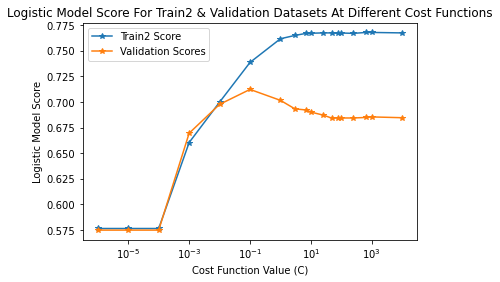

In [117]:
plt.figure()
plt.plot(C_range, train2_scores,label="Train2 Score",marker='*')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='*')
plt.xscale('log')
plt.xlabel('Cost Function Value (C)')
plt.ylabel('Logistic Model Score')
plt.title('Logistic Model Score For Train2 & Validation Datasets At Different Cost Functions')
plt.legend()
plt.show();

We can see that our optimal value for C is 0.01. We could select 0.1 but then there would be noticeable overfitting.

Now we can run the model:

In [125]:
my_final_model = LogisticRegression(C=0.01,random_state=1,solver = 'lbfgs')
my_final_model.fit(X_train_pos_hs2,y_train_pos_hs2)
print(f"The logistic model had a score of {my_final_model.score(X_train_pos_hs2,y_train_pos_hs2)} on the train2 dataset")

The logistic model had a score of 0.6998213887028355 on the train2 dataset


In [127]:
my_final_model = LogisticRegression(C=0.01,random_state=1,solver = 'lbfgs')
my_final_model.fit(X_train_pos_hs2,y_train_pos_hs2)
print(f"The logistic model had a score of {my_final_model.score(X_train_pos_hs2,y_train_pos_hs2)} on the train2 dataset")


The logistic model had a score of 0.6998213887028355 on the train2 dataset


In [129]:
my_final_model = LogisticRegression(C=0.01,random_state=1,solver = 'lbfgs')
my_final_model.fit(X_test_pos_hs,y_test_pos_hs)
print(f"The logistic model had a score of {my_final_model.score(X_test_pos_hs,y_test_pos_hs)} on the train2 dataset")

The logistic model had a score of 0.6990860089055543 on the train2 dataset


Our model has a very consistent score across all 3 datasets.

The origional logistic model score ont he dataset without the hotel_score column was: 
- The train_pos score is 0.6854977340209407
- The test_pos score is 0.7000234356690883

We can conclude that with the new hotel_score model:
- There is no longer underfitting, instead the train and test scores are almsot indentical (there is now very minor overfitting)
- The train and test score is therefore very similar
- However the scores are very similar to the original results

We can thereofre conclude that whilst adding hotel_score has helped with minmising the difference between the train and test model score, it has not helped much with improving overall accuracy in real terms.
